In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import table 
import scipy.stats as sts
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
allergy_df=pd.read_csv('data300k.csv')

In [4]:
allergy_df.describe()


,SUBJECT_ID,BIRTH_YEAR,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,SHELLFISH_ALG_END,FISH_ALG_START,FISH_ALG_END,MILK_ALG_START,MILK_ALG_END,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
count,333200.000000,333200.000000,333200.000000,333200.000000,5246.000000,1051.000000,1796.000000,527.000000,7289.000000,4580.000000,...,121.000000,49515.000000,41732.000000,55567.000000,25326.000000,63874.000000,25465.000000,117550.000000,117550.000000,117550.000000
mean,166600.500000,2001.261191,3.942140,10.336654,8.724076,6.431159,6.628690,5.337775,3.287408,2.473547,...,5.293306,4.282436,5.665702,7.275146,12.930347,5.979887,12.377142,6.439342,8.943442,5.298477
std,96186.699184,6.603479,4.646174,5.623426,5.273093,4.475387,5.015358,4.190826,4.098283,3.108223,...,3.821768,4.683577,5.016386,4.190266,4.292382,4.390784,4.895197,4.863507,5.284163,6.486661
min,1.000000,1983.000000,-4.312115,1.002053,0.093087,0.169747,0.076660,0.076660,-60.112252,-4.008214,...,0.112252,-103.961670,0.013689,-95.238877,2.488706,1.002053,3.003422,1.002053,1.002053,1.000000
25%,83300.750000,1996.000000,0.021903,5.289528,3.975359,2.620123,2.235455,1.934292,0.747433,0.561259,...,2.335387,0.654346,1.448323,3.912389,9.591376,2.165640,8.139630,2.105407,4.298426,1.000000
50%,166600.500000,2002.000000,1.763176,10.193018,8.361396,5.305955,5.156742,3.939767,1.420945,1.200548,...,4.383299,2.255989,4.112252,6.721424,13.199179,4.807666,12.539357,5.023956,8.268309,3.000000
75%,249900.250000,2007.000000,7.208761,15.616701,13.078029,9.609856,10.251198,7.885010,4.295688,2.997947,...,7.227926,6.811773,8.926078,10.220397,16.579740,9.095140,16.843258,10.012320,13.341547,7.000000
max,333200.000000,2012.000000,17.984942,18.997947,24.298426,18.778919,22.499658,18.962355,25.431896,17.911020,...,17.264887,23.342916,24.626968,23.649555,28.616016,23.649555,28.522930,18.997947,18.997947,118.000000


In [1018]:
allergy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333200 entries, 0 to 333199
Data columns (total 50 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SUBJECT_ID               333200 non-null  int64  
 1   BIRTH_YEAR               333200 non-null  int64  
 2   GENDER_FACTOR            333200 non-null  object 
 3   RACE_FACTOR              333200 non-null  object 
 4   ETHNICITY_FACTOR         333200 non-null  object 
 5   PAYER_FACTOR             333200 non-null  object 
 6   ATOPIC_MARCH_COHORT      333200 non-null  bool   
 7   AGE_START_YEARS          333200 non-null  float64
 8   AGE_END_YEARS            333200 non-null  float64
 9   SHELLFISH_ALG_START      5246 non-null    float64
 10  SHELLFISH_ALG_END        1051 non-null    float64
 11  FISH_ALG_START           1796 non-null    float64
 12  FISH_ALG_END             527 non-null     float64
 13  MILK_ALG_START           7289 non-null    float64
 14  MILK

In [128]:
#Clean data and copy it in the allallergy_df_clean dataframe
allergy_df_clean=allergy_df.copy()

#select all the numeric columns 
numeric_col=allergy_df.describe().columns

deleted_rows_count=0
data_err_number=0
#check if any data in the numeric cols is negetive
#then delete the rows with negetive values
for col in numeric_col:
    data_err_number= len(allergy_df_clean[allergy_df_clean[col] < 0])
    if (data_err_number > 0):
        print(f'{data_err_number} negetive values were removed from {col} column')
        allergy_df_clean=allergy_df_clean.drop(allergy_df_clean[allergy_df_clean[col] <= 0].index)
        deleted_rows_count+=data_err_number

allergy_df_clean.drop(columns=['TREENUT_ALG_START','TREENUT_ALG_END'],inplace=True)

#put all the unknown and other races in 'R3 - Other' group
allergy_df_clean_splitcols=allergy_df_clean.copy()
allergy_df_clean.replace('R4 - Unknown', 'R3 - Other',inplace=True)
print(f'\n------ {deleted_rows_count} rows deleted. --------')
allergy_df_clean.head()

25 negetive values were removed from AGE_START_YEARS column
6 negetive values were removed from MILK_ALG_START column
1 negetive values were removed from SOY_ALG_START column
3 negetive values were removed from EGG_ALG_START column
10 negetive values were removed from ATOPIC_DERM_START column
7 negetive values were removed from ALLERGIC_RHINITIS_START column

------ 52 rows deleted. --------


,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,1,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.093087,3.164956,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,S1 - Female,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,12.232717,18.880219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,3,2006,S0 - Male,R0 - White,E1 - Hispanic,P0 - Non-Medicaid,True,0.010951,6.726899,NaN,...,NaN,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,4,2004,S0 - Male,R3 - Other,E1 - Hispanic,P0 - Non-Medicaid,False,2.398357,9.111567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.013689,6.193018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
total_rows=len(allergy_df_clean['SUBJECT_ID'])
race_df=(allergy_df_clean.groupby('RACE_FACTOR').count()['SUBJECT_ID']/total_rows*100).to_frame()
race_df.columns=['Percentage']
race_df['Percentage'] = race_df['Percentage'].map("{:,.2f}%".format)
race_df

,Percentage
RACE_FACTOR,
R0 - White,55.02%
R1 - Black,29.35%
R2 - Asian or Pacific Islander,2.75%
R3 - Other,12.89%


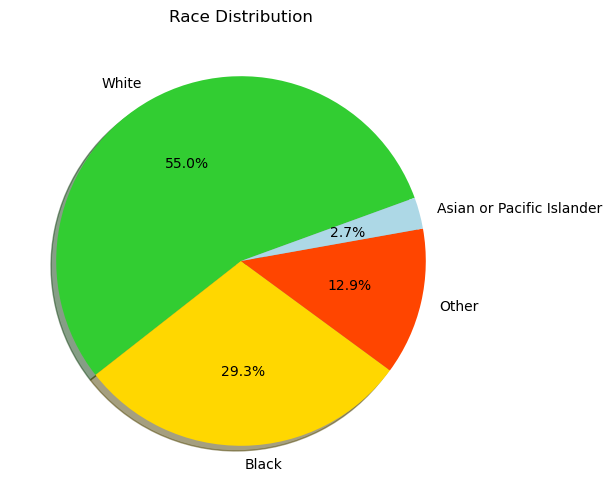

In [8]:
allergy_df_clean['RACE_FACTOR'].unique()
labels=[x[5:] for x in allergy_df_clean['RACE_FACTOR'].value_counts().index]
sizes=[x for x in allergy_df_clean['RACE_FACTOR'].value_counts()]
colors = ["limegreen","gold","orangered","lightblue","red"]

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=20 ,
        textprops={'fontsize': 10})
plt.title('Race Distribution')
plt.savefig('output/raceDist.png')

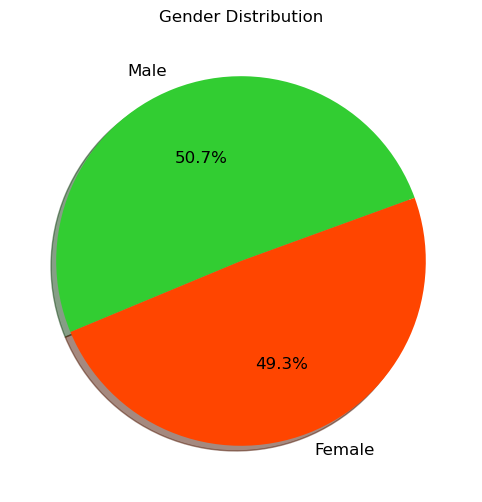

In [9]:
allergy_df_clean['GENDER_FACTOR'].unique()
labels=[x[5:] for x in allergy_df_clean['GENDER_FACTOR'].value_counts().index]
sizes=[x for x in allergy_df_clean['GENDER_FACTOR'].value_counts()]
colors = ["limegreen","orangered"]

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=20 ,
        textprops={'fontsize': 12})
plt.title('Gender Distribution')
plt.savefig('output/genderDist.png')

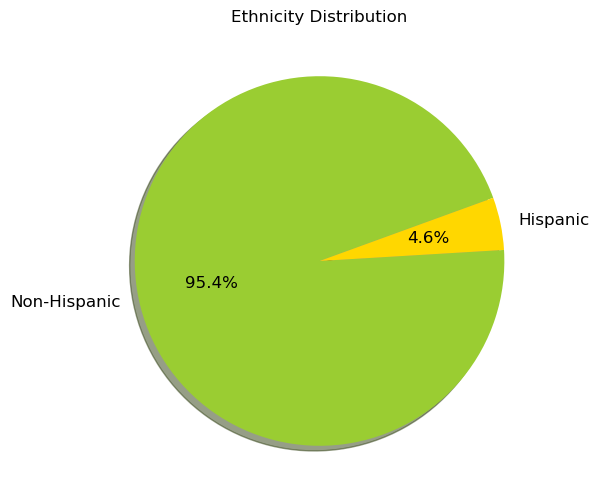

In [10]:
allergy_df_clean['ETHNICITY_FACTOR'].unique()
labels=[x[5:] for x in allergy_df_clean['ETHNICITY_FACTOR'].value_counts().index]
sizes=[x for x in allergy_df_clean['ETHNICITY_FACTOR'].value_counts()]
colors = ["yellowgreen","gold"]

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=20 ,
        textprops={'fontsize': 12})
plt.title('Ethnicity Distribution')
plt.savefig('output/EthnicityDist.png')

<Figure size 500x800 with 0 Axes>

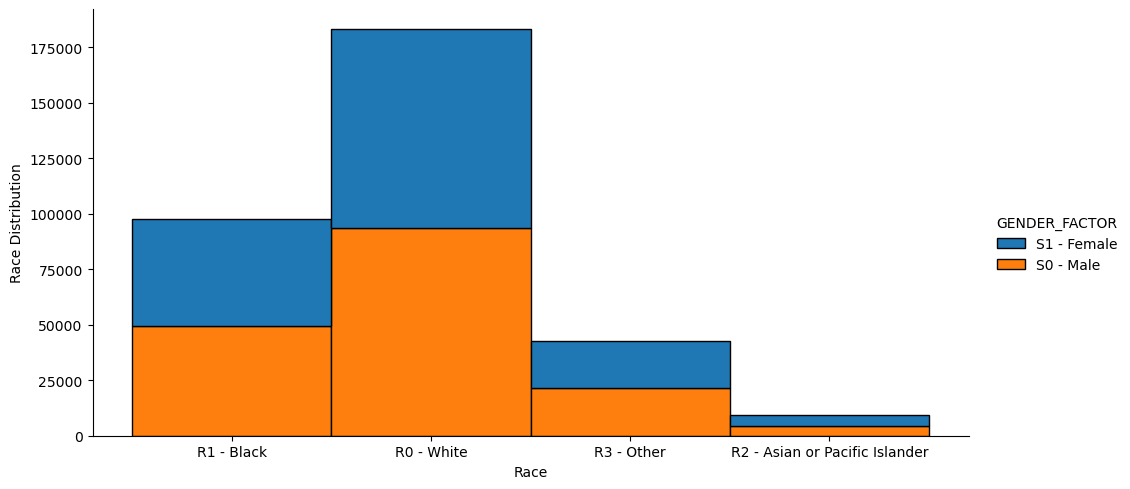

In [11]:
plt.figure(figsize=(5,8))
sns_plot=sns.displot( data=allergy_df_clean,x='RACE_FACTOR',
            hue='GENDER_FACTOR',alpha=1, multiple="stack",height=5, aspect=2)

sns.set_palette('dark')
sns_plot.axes[0,0].set_xlabel('Race')
sns_plot.axes[0,0].set_ylabel('Race Distribution')
sns_plot.savefig('output/RaceDist.png')



In [113]:
def get_allergen_df(allergen,allergy_dataframe=allergy_df_clean, agebin=0):
    allergen_start_column=allergen.upper()+'_ALG_START'
    allergen_end_column=allergen.upper()+'_ALG_END'
    
    if (agebin==0):
        allergen_df=allergy_dataframe[['SUBJECT_ID', 'BIRTH_YEAR', 'GENDER_FACTOR', 'RACE_FACTOR',
       'ETHNICITY_FACTOR','AGE_START_YEARS', 'AGE_END_YEARS', allergen_start_column,
       allergen_end_column]].copy()
    elif (agebin==1):
        allergen_df=allergy_dataframe[['SUBJECT_ID', 'BIRTH_YEAR', 'GENDER_FACTOR', 'RACE_FACTOR',
       'ETHNICITY_FACTOR','AGE_START_YEARS', 'AGE_END_YEARS', allergen_start_column,
       allergen_end_column,'AGE_BIN']].copy()

    allergen_df_clean=allergen_df[(allergen_df[allergen_start_column].isna()==False)]
    allergen_df_clean.reset_index(inplace=True,drop=True)
    
    #add SENSITIVITY columns
    allergen_df_clean['SENSITIVITY_START_TAG']=''
    allergen_df_clean['SENSITIVITY_END_TAG']=''
    
    #fill out the start SENSITIVITY colums based on SENSITIVITY ranges
    allergen_df_clean['SENSITIVITY_START_TAG'][allergen_df_clean[allergen_start_column] <= 0.35 ]='Very Low'
    allergen_df_clean['SENSITIVITY_START_TAG'][ (0.35 < allergen_df_clean[allergen_start_column]) & 
                                               (allergen_df_clean[allergen_start_column]<= 0.7) ]='Low'
    allergen_df_clean['SENSITIVITY_START_TAG'][ (0.7 < allergen_df_clean[allergen_start_column]) & 
                                               (allergen_df_clean[allergen_start_column] <= 3.5) ]='Moderate'
    allergen_df_clean['SENSITIVITY_START_TAG'][ (3.5 < allergen_df_clean[allergen_start_column]) &
                                               (allergen_df_clean[allergen_start_column] <= 17.5) ]='High'
    allergen_df_clean['SENSITIVITY_START_TAG'][ allergen_df_clean[allergen_start_column] > 17.5 ]='Very High'
    
    
     #fill out the end SENSITIVITY colums based on SENSITIVITY ranges
    allergen_df_clean['SENSITIVITY_END_TAG'][allergen_df_clean[allergen_end_column] <= 0.35 ]='Very Low'
    allergen_df_clean['SENSITIVITY_END_TAG'][ (0.35 < allergen_df_clean[allergen_end_column]) &
                                             (allergen_df_clean.dropna()[allergen_end_column] <= 0.7) ]='Low'
    allergen_df_clean['SENSITIVITY_END_TAG'][ (0.7 < allergen_df_clean[allergen_end_column]) &
                                             (allergen_df_clean.dropna()[allergen_end_column] <= 3.5) ]='Moderate'
    allergen_df_clean['SENSITIVITY_END_TAG'][ (3.5 < allergen_df_clean[allergen_end_column]) &
                                             ( allergen_df_clean[allergen_end_column] <= 17.5) ]='High'
    allergen_df_clean['SENSITIVITY_END_TAG'][ allergen_df_clean[allergen_end_column] > 17.5 ]='Very High'
    
    
    return allergen_df_clean


In [114]:
peanut_df_clean=get_allergen_df('peanut')

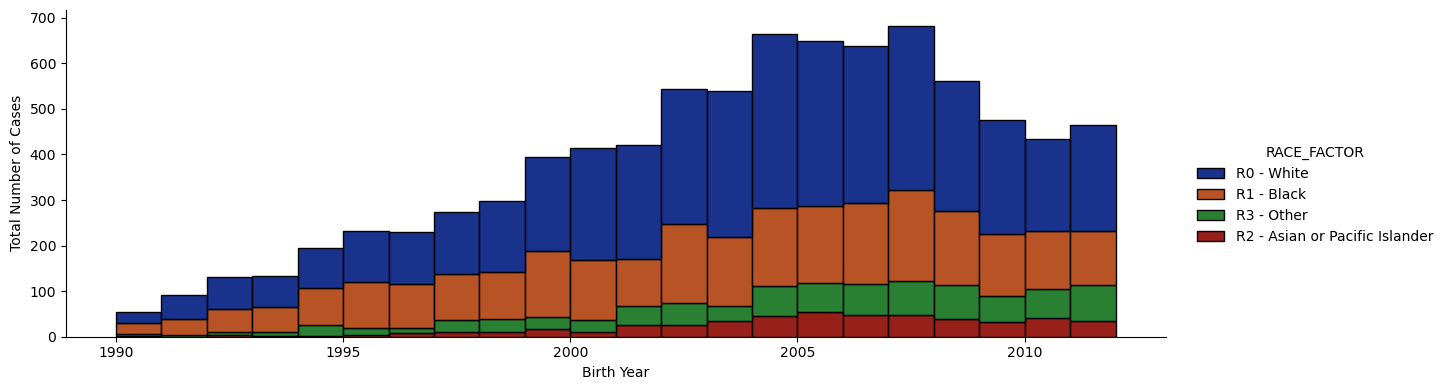

In [110]:
years=range(1990,2013)
sns_plot=sns.displot( data=peanut_df_clean,x='BIRTH_YEAR',bins=years,
            hue='RACE_FACTOR',alpha=0.9, multiple="stack",
           height=4,aspect=3)
sns.set_palette('dark')
plt.xlabel('Birth Year')
plt.ylabel('Total Number of Cases')

sns_plot.savefig('output/yearSummary.png')


In [17]:
allergy_df_clean['BIRTH_YEAR'].describe().to_frame()

,BIRTH_YEAR
count,332801.000000
mean,2001.253329
std,6.601794
min,1983.000000
25%,1996.000000
50%,2002.000000
75%,2007.000000
max,2012.000000


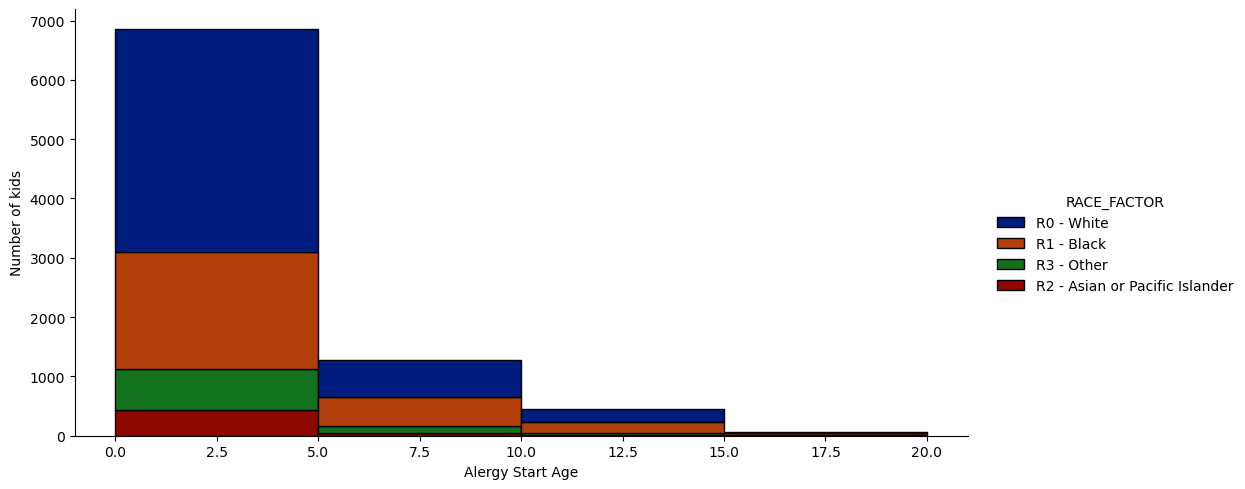

In [18]:
years=[0,5,10,15,20]
sns_plot=sns.displot( data=peanut_df_clean,x='AGE_START_YEARS',bins=years,
            hue='RACE_FACTOR',alpha=1, multiple="stack",
                    height=5,aspect=2)

sns_plot.axes[0,0].set_xlabel('Alergy Start Age')
sns_plot.axes[0,0].set_ylabel('Number of kids')

sns_plot.savefig('output/alergyStartAgeDist.png')

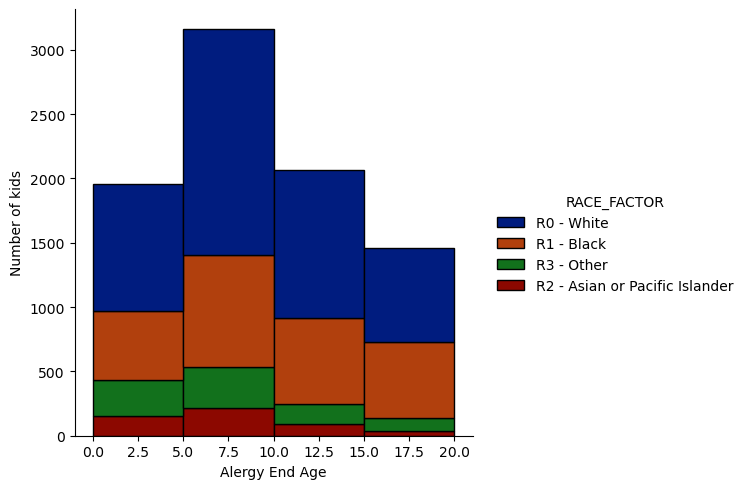

In [19]:
years=[0,5,10,15,20]
sns_plot=sns.displot( data=peanut_df_clean,x='AGE_END_YEARS',bins=years,
            hue='RACE_FACTOR',alpha=1, multiple="stack",palette='dark')

sns_plot.axes[0,0].set_xlabel('Alergy End Age')
sns_plot.axes[0,0].set_ylabel('Number of kids')

sns_plot.savefig('output/alergyEndAgeDist.png')

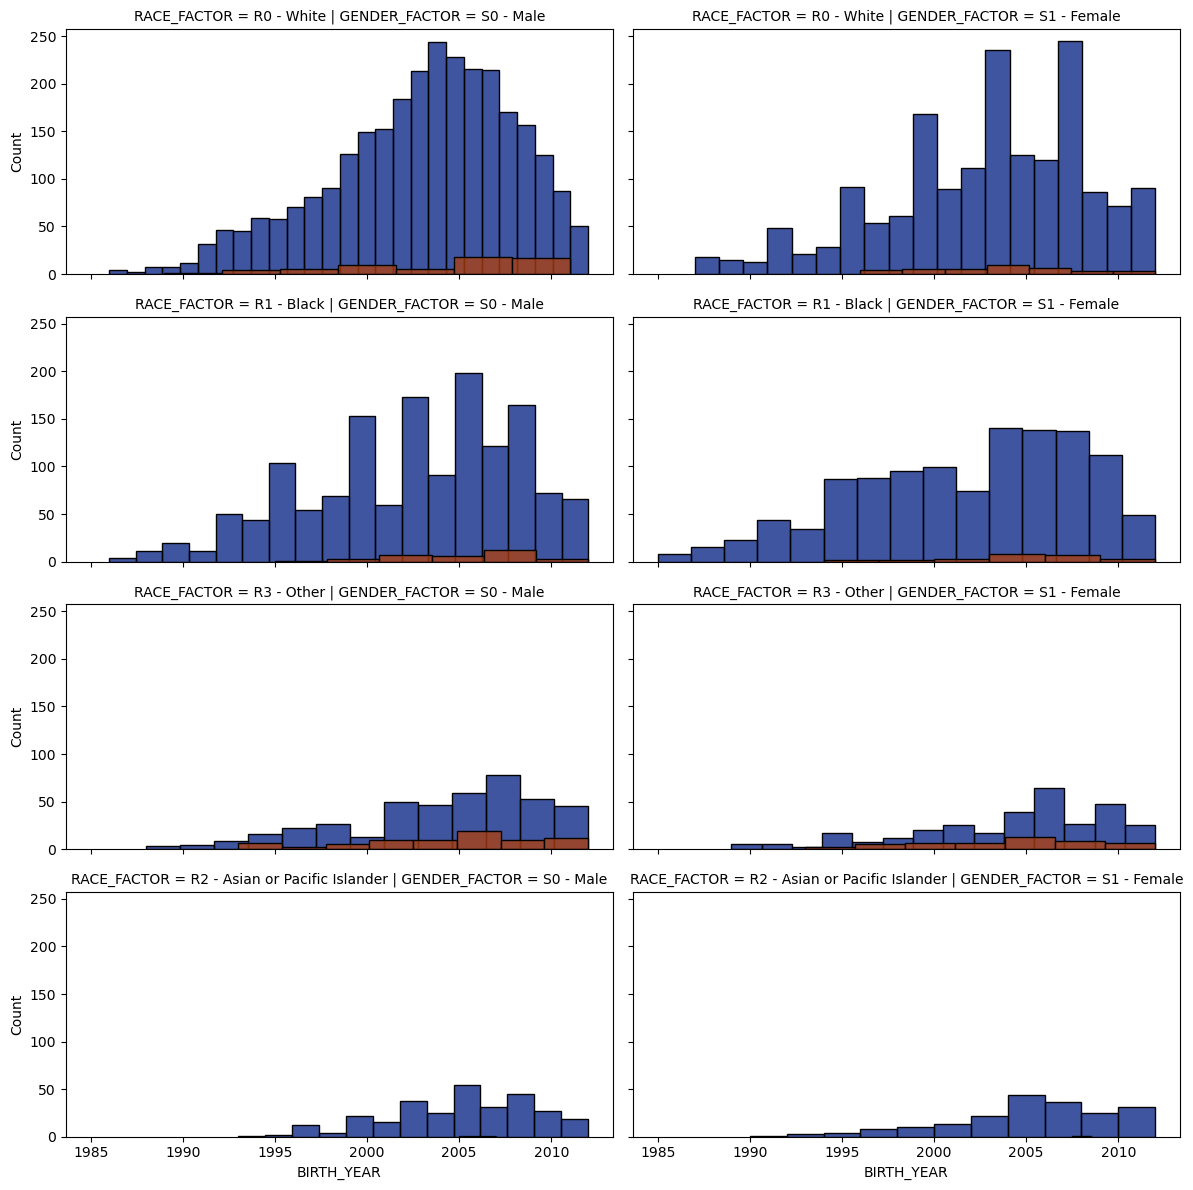

In [20]:
g= sns.FacetGrid(data=peanut_df_clean,col='GENDER_FACTOR',row='RACE_FACTOR',height=3, aspect=2,
                 hue='ETHNICITY_FACTOR',
                 hue_order=['E0 - Non-Hispanic', 'E1 - Hispanic'], 
                 palette='dark', despine=False)
g.map(sns.histplot,'BIRTH_YEAR')


In [21]:
#find allergy_age description  
allergy_age_stat=allergy_df_clean.describe()[['BIRTH_YEAR','AGE_START_YEARS','AGE_END_YEARS']]
allergy_age_stat


,BIRTH_YEAR,AGE_START_YEARS,AGE_END_YEARS
count,332801.000000,332801.000000,332801.000000
mean,2001.253329,3.946501,10.343202
std,6.601794,4.646885,5.622022
min,1983.000000,0.002738,1.007529
25%,1996.000000,0.021903,5.295003
50%,2002.000000,1.776865,10.201232
75%,2007.000000,7.214237,15.622177
max,2012.000000,17.984942,18.997947


In [22]:
test_duration=allergy_df_clean['AGE_END_YEARS']-allergy_df_clean['AGE_START_YEARS']
start_age_missing=len(allergy_df_clean[allergy_df_clean['AGE_START_YEARS'].isna()==True])
end_age_missing=len(allergy_df_clean[allergy_df_clean['AGE_END_YEARS'].isna()==True])

test_duration_df=test_duration.describe().to_frame()
test_duration_df.columns=['Test Duration Summary']
print(f' Start AGE Missing :  {start_age_missing}\n',   
      f'End AGE Missing :  {end_age_missing}\n')

    

test_duration_df

 Start AGE Missing :  0
 End AGE Missing :  0



,Test Duration Summary
count,332801.000000
mean,6.396701
std,3.391412
min,1.002053
25%,3.430527
50%,6.157426
75%,9.215606
max,12.982888


In [23]:
soy_df_clean=get_allergen_df('soy')
soy_df_clean.head()

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,AGE_START_YEARS,AGE_END_YEARS,SOY_ALG_START,SOY_ALG_END,SENSITIVITY_START_TAG,SENSITIVITY_END_TAG
0,59,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,0.002738,5.875428,4.358658,NaN,High,
1,71,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,0.421629,5.133470,0.544832,0.544832,Low,Low
2,111,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,0.145106,6.781656,0.106776,0.106776,Very Low,Very Low
3,161,2006,S1 - Female,R2 - Asian or Pacific Islander,E0 - Non-Hispanic,0.013689,6.611910,6.428474,NaN,High,
4,198,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,0.016427,6.855578,0.334018,0.334018,Very Low,Very Low


In [26]:
#plot the SENSITIVITY for each allergen (at start of the test and the end of the test)
def plot_sensitivity(allergen,color='blue'):
    allergen_df=get_allergen_df(allergen)
   
    #for start SENSITIVITY
    x_value=allergen_df['SENSITIVITY_START_TAG'].value_counts().index
    height=allergen_df['SENSITIVITY_START_TAG'].value_counts()

    edgecolor=['black']
    fontdict = {
            'size': 10,
            }
    plt.figure(figsize=(9, 5)) 
    
    plt.subplot(1,2,1)
    plt.bar( x=x_value,height=height,edgecolor=edgecolor,color=color)
    plt.xticks(rotation=90)
    plt.title(allergen.upper()+' (Start)')
    plt.ylabel('Number of cases')
    plt.xlabel('SENSITIVITY levels')
    plt.rc('xtick', labelsize=10) 
   # plt.savefig(f'output_data/{allergen}sensitivity_start.png')
    plt.tight_layout()
    
    
    #for end SENSITIVITY
    x_value=allergen_df['SENSITIVITY_END_TAG'].value_counts().drop('').index
  
    height=allergen_df['SENSITIVITY_END_TAG'].value_counts().drop('')

    edgecolor=['black']
    fontdict = {
            'size': 10,
            }
    
    plt.subplot(1,2,2)
    plt.bar( x=x_value,height=height,edgecolor=edgecolor,color=color)
    plt.xticks(rotation=90)
    plt.title(allergen.upper()+'(End)')
    plt.ylabel('Number of cases')
    plt.xlabel('SENSITIVITY levels')
    plt.rc('xtick', labelsize=10) 
    plt.tight_layout()
    plt.savefig(f'output/{allergen}sensitivity.png')



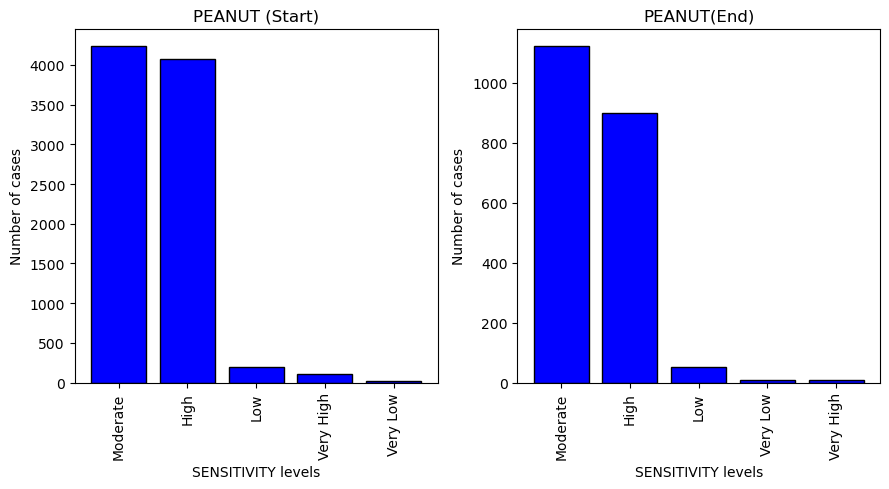

In [27]:
plot_sensitivity('peanut')

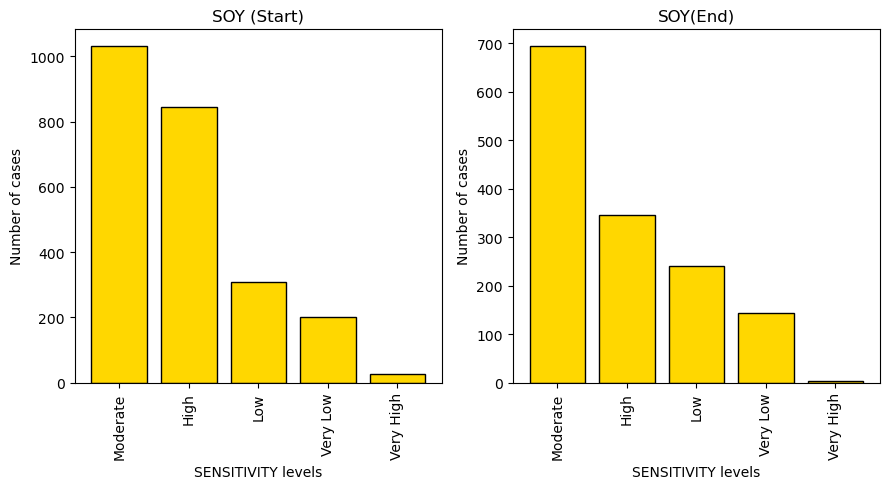

In [28]:
plot_sensitivity('soy','gold')

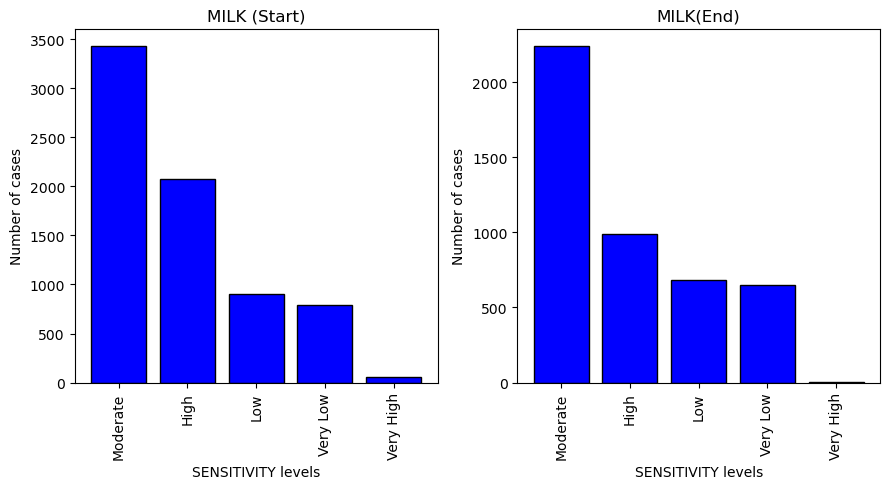

In [29]:
plot_sensitivity('milk')

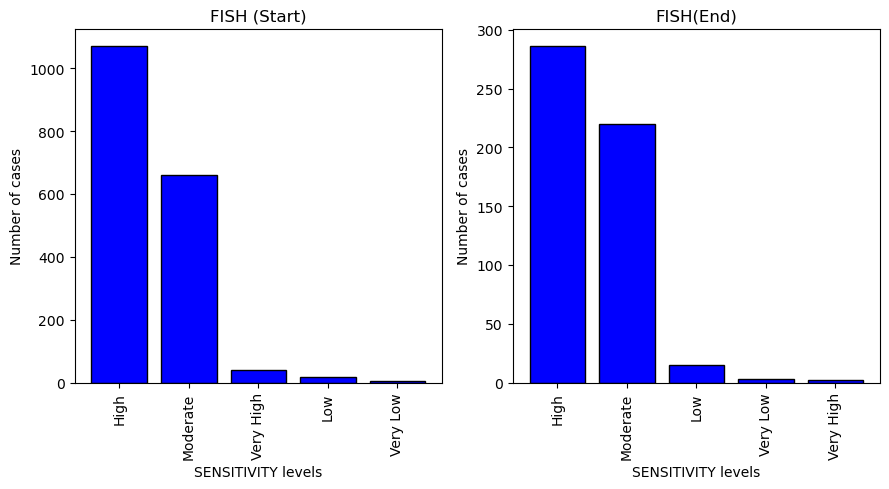

In [30]:
plot_sensitivity('fish')

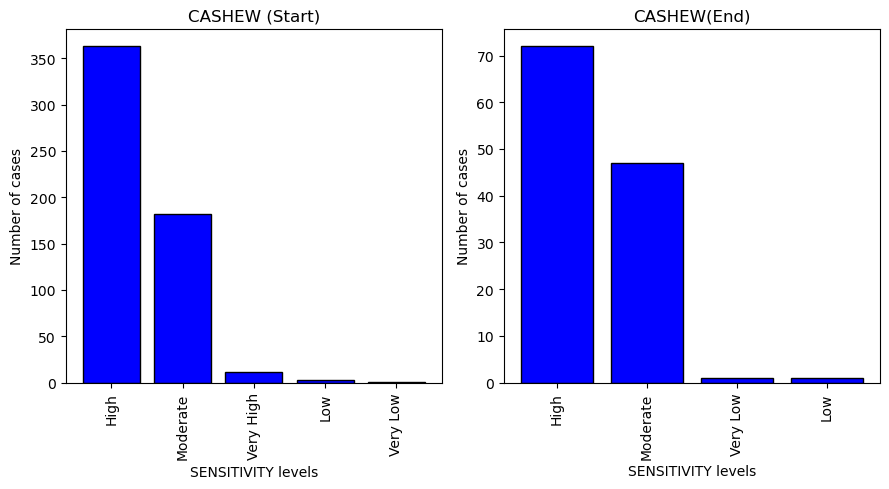

In [31]:
plot_sensitivity('cashew')

In [32]:
df=(soy_df_clean['SENSITIVITY_START_TAG'].value_counts()/len(soy_df_clean)*100).map("{:,.2f}%".format).to_frame()
df

,SENSITIVITY_START_TAG
Moderate,42.76%
High,35.01%
Low,12.73%
Very Low,8.38%
Very High,1.12%


In [33]:
#Creat the soy dataframe
soy_df_clean=get_allergen_df('soy')
soy_df_clean.head()

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,AGE_START_YEARS,AGE_END_YEARS,SOY_ALG_START,SOY_ALG_END,SENSITIVITY_START_TAG,SENSITIVITY_END_TAG
0,59,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,0.002738,5.875428,4.358658,NaN,High,
1,71,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,0.421629,5.133470,0.544832,0.544832,Low,Low
2,111,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,0.145106,6.781656,0.106776,0.106776,Very Low,Very Low
3,161,2006,S1 - Female,R2 - Asian or Pacific Islander,E0 - Non-Hispanic,0.013689,6.611910,6.428474,NaN,High,
4,198,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,0.016427,6.855578,0.334018,0.334018,Very Low,Very Low


In [34]:
#create year_summary just for the peanut and soy 
soy_year_summary=soy_df_clean.describe()['BIRTH_YEAR'].to_frame().reset_index()
soy_year_summary.columns=['','Soy Year Summary']

peanut_year_summary=peanut_df_clean.describe()['BIRTH_YEAR'].to_frame().reset_index()
peanut_year_summary.columns=['','Peanut Year Summary']


pd.merge(peanut_year_summary,soy_year_summary,on='')

,,Peanut Year Summary,Soy Year Summary
0,count,8640.000000,2411.000000
1,mean,2003.033681,2004.404397
2,std,5.424574,5.258493
3,min,1985.000000,1985.000000
4,25%,2000.000000,2002.000000
5,50%,2004.000000,2005.000000
6,75%,2007.000000,2008.000000
7,max,2012.000000,2012.000000


Text(0, 0.5, 'Allergy Response (Ku/l)')

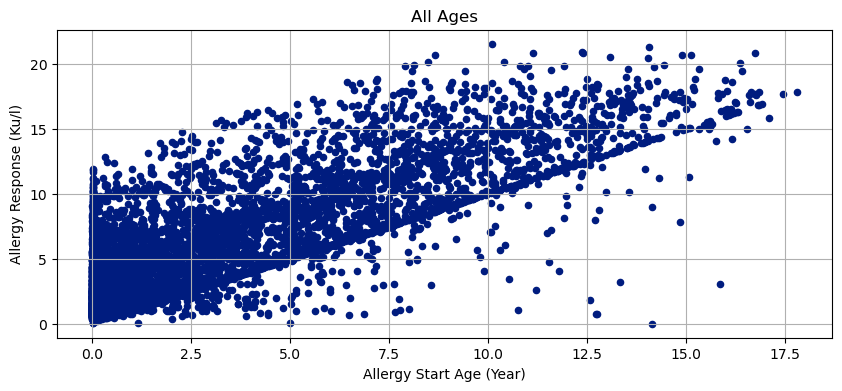

In [35]:
peanut_df_clean.plot(kind="scatter", x="AGE_START_YEARS", y="PEANUT_ALG_START", grid=True,figsize=(10,4))
plt.title('All Ages')
plt.xlabel('Allergy Start Age (Year)')
plt.ylabel('Allergy Response (Ku/l)')

In [36]:
soy_df_clean['SOY_ALG_START'].min()

0.027378508

Text(0, 0.5, 'Allergy Response (Ku/l)')

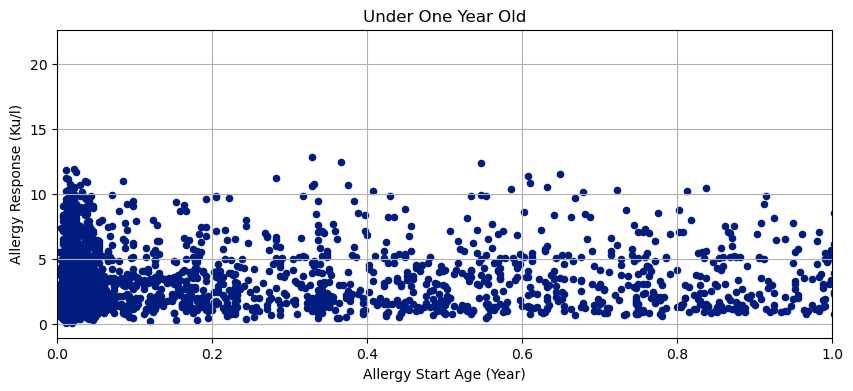

In [37]:
peanut_df_clean.plot(kind="scatter", x="AGE_START_YEARS", y="PEANUT_ALG_START", grid=True,figsize=(10,4))
plt.xlim(0,1)
plt.title('Under One Year Old')
plt.xlabel('Allergy Start Age (Year)')
plt.ylabel('Allergy Response (Ku/l)')


Text(0, 0.5, 'Allergy Response (Ku/l)')

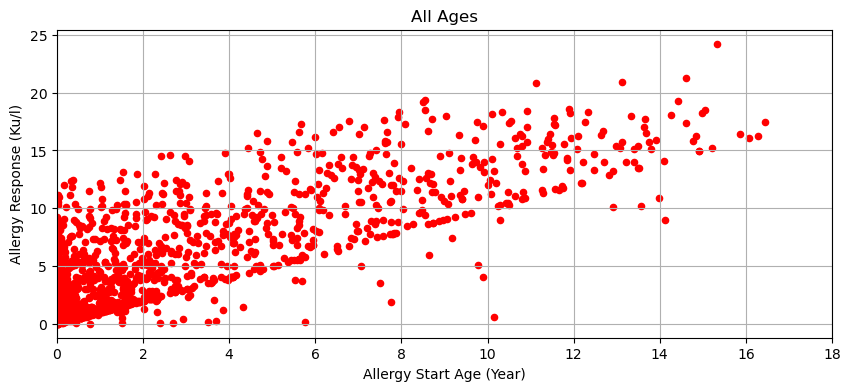

In [38]:
soy_df_clean.plot(kind="scatter", x="AGE_START_YEARS", y="SOY_ALG_START", grid=True,figsize=(10,4),color='red')
plt.title('All Ages')
plt.xlim(0,18)
plt.xlabel('Allergy Start Age (Year)')
plt.ylabel('Allergy Response (Ku/l)')

Text(0, 0.5, 'Allergy Response (Ku/l)')

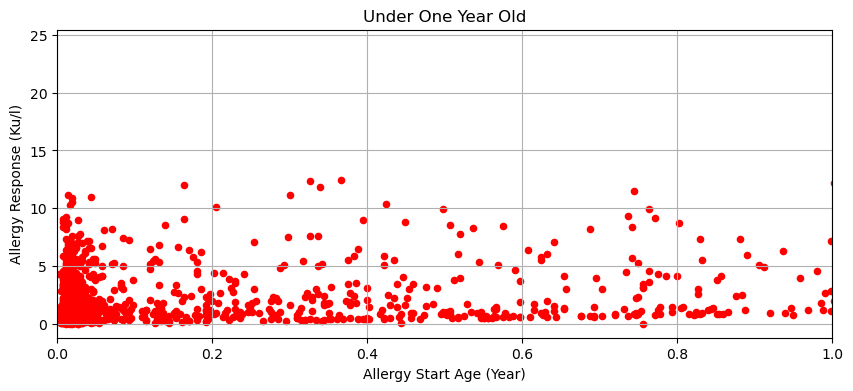

In [39]:
soy_df_clean.plot(kind="scatter", x="AGE_START_YEARS", y="SOY_ALG_START", grid=True,figsize=(10,4),color='red')
plt.xlim(0,1)
plt.title('Under One Year Old')
plt.xlabel('Allergy Start Age (Year)')
plt.ylabel('Allergy Response (Ku/l)')

[Text(0.5, 1.0, 'First Response vs Last Response for Peanut')]

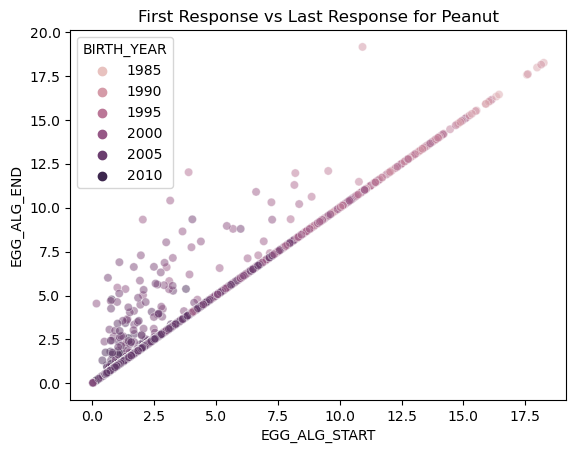

In [40]:
sns_plot= sns.scatterplot(data=allergy_df_clean,x='EGG_ALG_START',y='EGG_ALG_END',
            hue='BIRTH_YEAR',alpha=0.5)
sns_plot.set(title='First Response vs Last Response for Peanut')


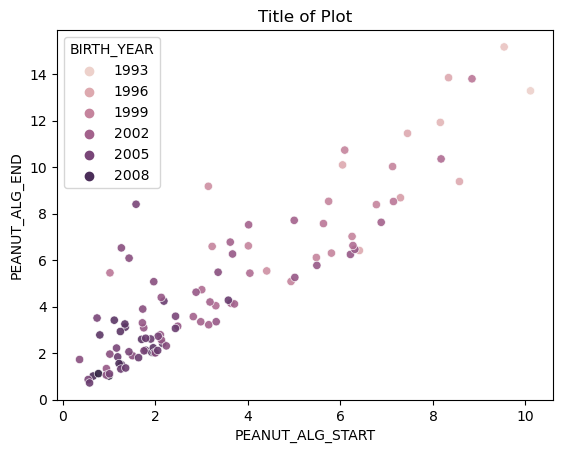

In [41]:
df=peanut_df_clean[peanut_df_clean['PEANUT_ALG_START']<peanut_df_clean['PEANUT_ALG_END']]
fig = sns.scatterplot(data=df,x='PEANUT_ALG_START',y='PEANUT_ALG_END',
            hue='BIRTH_YEAR',alpha=0.9).set(title='Title of Plot')


In [42]:
#Peanut Gender Summary
total_females=peanut_df_clean[peanut_df_clean['GENDER_FACTOR']=='S1 - Female'].count()['SUBJECT_ID']
female_percentage=round(total_females/total_rows*100,2)
black_females=peanut_df_clean[(peanut_df_clean['RACE_FACTOR']=='R1 - Black')& 
                (peanut_df_clean['GENDER_FACTOR']=='S1 - Female')].count()['SUBJECT_ID']/total_females*100
white_females=peanut_df_clean[(peanut_df_clean['RACE_FACTOR']=='R0 - White')& 
                (peanut_df_clean['GENDER_FACTOR']=='S1 - Female')].count()['SUBJECT_ID']/total_females*100



total_males=peanut_df_clean[peanut_df_clean['GENDER_FACTOR']=='S0 - Male'].count()['SUBJECT_ID']
male_percentage=round(total_males/total_rows*100,2)
black_males=peanut_df_clean[(peanut_df_clean['RACE_FACTOR']=='R1 - Black')& 
                (peanut_df_clean['GENDER_FACTOR']=='S0 - Male')].count()['SUBJECT_ID']/total_males*100
white_males=peanut_df_clean[(peanut_df_clean['RACE_FACTOR']=='R0 - White')& 
                (peanut_df_clean['GENDER_FACTOR']=='S0 - Male')].count()['SUBJECT_ID']/total_males*100




total_females=len(peanut_df_clean[peanut_df_clean['GENDER_FACTOR']=='S1 - Female'])
total_females
print('----   Peanut Gender Summary  ----')
print (f'Total number of females : {total_females}')
print (f'Percentage of females : {female_percentage}%')
print(f'Percentage of White Females: {round(white_females,2)}%')
print(f'Percentage of Black Females: {round(black_females,2)}%')

print('-----------------------')
print (f'Total number of males : {total_males}')
print (f'Percentage of males : {male_percentage}%')
print(f'Percentage of White Males: {round(white_males,2)}%')
print(f'Percentage of Black Males: {round(black_males,2)}%')


----   Peanut Gender Summary  ----
Total number of females : 3454
Percentage of females : 1.04%
Percentage of White Females: 50.03%
Percentage of Black Females: 33.82%
-----------------------
Total number of males : 5186
Percentage of males : 1.56%
Percentage of White Males: 55.73%
Percentage of Black Males: 28.9%


In [43]:
#Soy Gender Summary
total_females=soy_df_clean[soy_df_clean['GENDER_FACTOR']=='S1 - Female'].count()['SUBJECT_ID']
female_percentage=round(total_females/total_rows*100,2)
black_females=soy_df_clean[(soy_df_clean['RACE_FACTOR']=='R1 - Black')& 
                (soy_df_clean['GENDER_FACTOR']=='S1 - Female')].count()['SUBJECT_ID']/total_females*100
white_females=soy_df_clean[(soy_df_clean['RACE_FACTOR']=='R0 - White')& 
                (soy_df_clean['GENDER_FACTOR']=='S1 - Female')].count()['SUBJECT_ID']/total_females*100



total_males=soy_df_clean[soy_df_clean['GENDER_FACTOR']=='S0 - Male'].count()['SUBJECT_ID']
male_percentage=round(total_males/total_rows*100,2)
black_males=soy_df_clean[(soy_df_clean['RACE_FACTOR']=='R1 - Black')& 
                (soy_df_clean['GENDER_FACTOR']=='S0 - Male')].count()['SUBJECT_ID']/total_males*100
white_males=soy_df_clean[(soy_df_clean['RACE_FACTOR']=='R0 - White')& 
                (soy_df_clean['GENDER_FACTOR']=='S0 - Male')].count()['SUBJECT_ID']/total_males*100




total_females=len(soy_df_clean[soy_df_clean['GENDER_FACTOR']=='S1 - Female'])
total_females
print('----   Soy Gender Summary  ----')
print (f'Total number of females : {total_females}')
print (f'Percentage of females : {female_percentage}%')
print(f'Percentage of White Females: {round(white_females,2)}%')
print(f'Percentage of Black Females: {round(black_females,2)}%')

print('-----------------------')
print (f'Total number of males : {total_males}')
print (f'Percentage of males : {male_percentage}%')
print(f'Percentage of White Males: {round(white_males,2)}%')
print(f'Percentage of Black Males: {round(black_males,2)}%')


----   Soy Gender Summary  ----
Total number of females : 923
Percentage of females : 0.28%
Percentage of White Females: 61.43%
Percentage of Black Females: 22.64%
-----------------------
Total number of males : 1488
Percentage of males : 0.45%
Percentage of White Males: 60.08%
Percentage of Black Males: 23.99%


In [44]:
allergen1=[]
allergen2=[]
corr_list=[]
year_list=[]

allergen_list=allergy_df_clean.columns[9:-9]
years=allergy_df_clean['BIRTH_YEAR'].unique()

allergen_list=[x for x in allergen_list if 'ALG_START' in x]
    
for z in years :
    allergy_year_df=allergy_df_clean[allergy_df_clean['BIRTH_YEAR']==z]
    for x in allergen_list:
        for y in allergen_list[allergen_list.index(x)+1:]:
                correlation = sts.pearsonr(allergy_year_df[x].fillna(0),
                                           allergy_year_df[y].fillna(0))

                if (correlation[0] > 0.5):
                    allergen1.append(x)
                    allergen2.append(y)
                    corr_list.append(round(correlation[0],2))
                    year_list.append(z)
                    
allergen_corr_df=pd.DataFrame(data={'Allergen_1':[allergen_name[:-10] for allergen_name in allergen1], 
                              'Allergen2':[allergen_name[:-10] for allergen_name in allergen2],
                               'r_value':corr_list, },
                              index=year_list)
print('\n----------------------------------------------------')
print('---- The Most Correlated Allergen in Each Year -----')
print('----------------------------------------------------')
allergen_corr_df.index.names=['Year']
allergen_corr_df


----------------------------------------------------
---- The Most Correlated Allergen in Each Year -----
----------------------------------------------------


,Allergen_1,Allergen2,r_value
Year,,,
1994,ALMOND,HAZELNUT,0.51
1994,BRAZIL,HAZELNUT,0.62
1999,WALNUT,PECAN,0.58
1990,WALNUT,PECAN,0.58
1990,ALMOND,HAZELNUT,0.69
1996,PISTACH,HAZELNUT,0.53
1991,WALNUT,ALMOND,0.55
1991,WALNUT,HAZELNUT,0.64
1991,ALMOND,HAZELNUT,0.59


In [45]:
count_list=[]
mean_list=[]
max_list=[]
min_list=[]
allergen_stats=allergy_df_clean.describe()

for x in allergen_list:
    count=allergen_stats.loc['count',x]
    count_list.append(count)
    mean=round(allergen_stats.loc['mean',x],2)
    mean_list.append(mean)
    max_num = round(allergen_stats.loc['max',x],2)
    max_list.append(max_num)
    min_num = round(allergen_stats.loc['min',x],2)
    min_list.append(min_num)

allergy_response_df=pd.DataFrame(data={'Count':count_list,
                                       'Mean':mean_list,
                                       'Max':max_list,
                                       'Min':min_list},
                                 index=[allergen_name[:-10] for allergen_name in allergen_list])

print('\n----------------------------------')
print('---- Allergy Response Summary -----')
print('----------------------------------')
allergy_response_df.index.names=['Allergen']
allergy_response_df.sort_values(by=['Count','Mean'],ascending=False,inplace=True)
allergy_response_df


----------------------------------
---- Allergy Response Summary -----
----------------------------------


,Count,Mean,Max,Min
Allergen,,,,
PEANUT,8640.0,5.03,21.52,0.00
MILK,7255.0,3.31,25.43,0.00
EGG,6044.0,3.30,22.16,0.02
SHELLFISH,5240.0,8.73,24.30,0.09
SOY,2411.0,3.97,24.22,0.03
FISH,1793.0,6.64,22.50,0.08
WHEAT,1144.0,4.55,22.84,0.16
SESAME,765.0,6.13,22.72,0.49
WALNUT,704.0,7.60,20.05,0.34


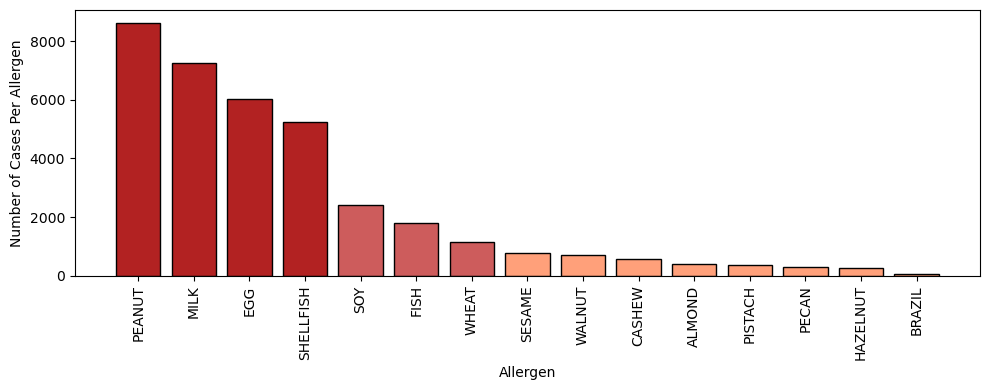

In [47]:
colors=[]
percentage_25=allergy_response_df.describe().loc['25%','Count']
percentage_50=allergy_response_df.describe().loc['50%','Count']
percentage_75=allergy_response_df.describe().loc['75%','Count']

for value in allergy_response_df['Count']:
    if value> percentage_75:
        colors.append('firebrick')
    elif value > percentage_50:
        colors.append('indianred')
    else:
        colors.append('lightsalmon')
edgecolor=['black']
fontdict = {
        'size': 10,
        }
plt.figure(figsize=(10,4))
plt.bar( x=allergy_response_df.index,height=allergy_response_df['Count'],color=colors,edgecolor=edgecolor)
plt.xticks(rotation=90)
plt.ylabel('Number of Cases Per Allergen')
plt.xlabel('Allergen')
plt.rc('xtick', labelsize=10) 
plt.tight_layout()
plt.savefig('output/allergenDist.png')


------------------------------
<h1>Leah's Part</h1>

In [51]:
# Analyze fish allergen group (begin by filling NA values with zero due to the NA meaning no recorded response from study)

fish_df_clean=get_allergen_df('fish')

nan_count=len(fish_df_clean[fish_df_clean['FISH_ALG_END'].isna()==True])

fish_df_clean.fillna(0.0,inplace=True)
print (f'\n{nan_count} number of NAs in the FISH_ALG_END column filled with zeros.\n')
fish_df_clean.head()


1267 number of NAs in the FISH_ALG_END column filled with zeros.



,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,AGE_START_YEARS,AGE_END_YEARS,FISH_ALG_START,FISH_ALG_END,SENSITIVITY_START_TAG,SENSITIVITY_END_TAG
0,402,1991,S1 - Female,R2 - Asian or Pacific Islander,E0 - Non-Hispanic,10.401095,18.669405,16.763860,0.000000,High,
1,430,1997,S0 - Male,R2 - Asian or Pacific Islander,E0 - Non-Hispanic,4.090349,15.665982,6.819986,6.819986,High,High
2,595,1996,S0 - Male,R1 - Black,E0 - Non-Hispanic,9.196441,16.024641,15.342916,15.342916,High,High
3,842,1997,S1 - Female,R1 - Black,E0 - Non-Hispanic,5.396304,16.763860,6.524298,6.524298,High,High
4,1001,1996,S0 - Male,R1 - Black,E0 - Non-Hispanic,5.043121,16.495551,6.132786,0.000000,High,


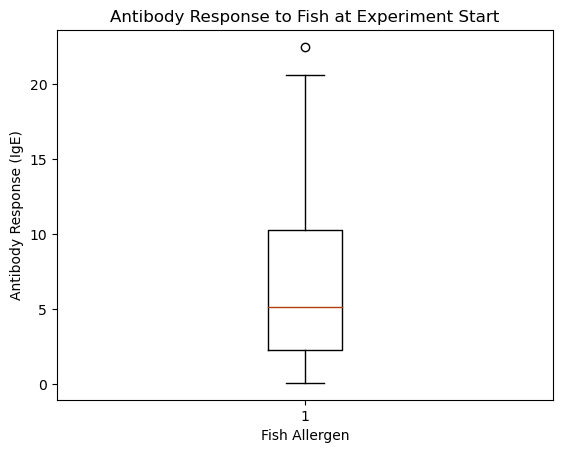

In [52]:
# Create a boxplot to visualize fish antibody response at the beginning of the study

fig1, ax1 = plt.subplots()
ax1.set_title('Antibody Response to Fish at Experiment Start')
ax1.set_ylabel("Antibody Response (IgE)")
ax1.set_xlabel("Fish Allergen")
ax1.boxplot(fish_df_clean["FISH_ALG_START"])
plt.show()

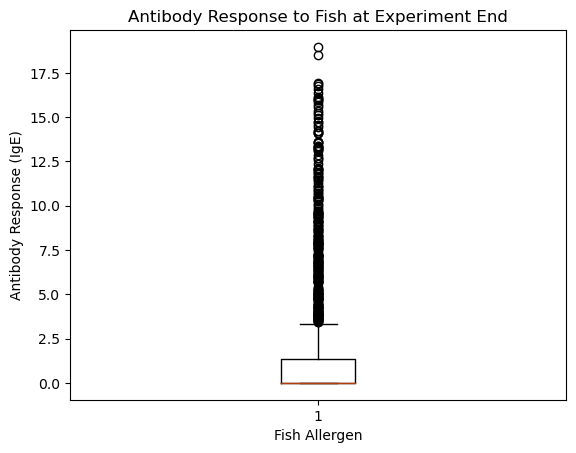

In [53]:
# Create a boxplot to visualize fish antibody response at the end of the study

fig1, ax1 = plt.subplots()
ax1.set_title('Antibody Response to Fish at Experiment End')
ax1.set_ylabel("Antibody Response (IgE)")
ax1.set_xlabel("Fish Allergen")
ax1.boxplot(fish_df_clean["FISH_ALG_END"])
plt.show()

Text(0.5, 1.0, 'All Ages')

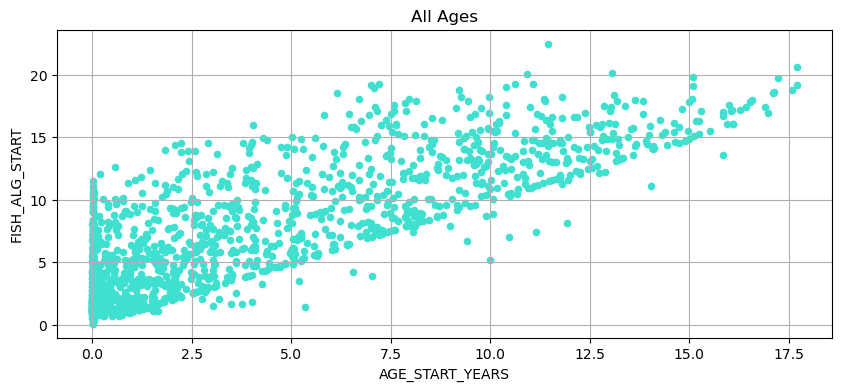

In [54]:
# Visualize the first recorded age of each participant in a scatter plot

fish_df_clean.plot(kind="scatter", x="AGE_START_YEARS", y="FISH_ALG_START", grid=True,figsize=(10,4), color='turquoise')
plt.title('All Ages')

Text(0.5, 1.0, 'Under One Year Old')

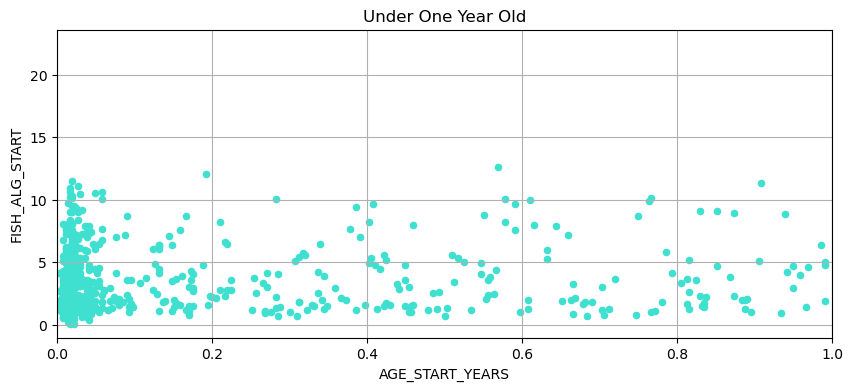

In [55]:
# Visualize infant data in a scatter plot

fish_df_clean.plot(kind="scatter", x="AGE_START_YEARS", y="FISH_ALG_START", grid=True,figsize=(10,4), color='turquoise')
plt.xlim(0,1)
plt.title('Under One Year Old')


In [56]:
# Create DF of just the allergen response at the beginning of the study 

start_df = allergy_df_clean.filter(like="START")
start_df

,AGE_START_YEARS,SHELLFISH_ALG_START,FISH_ALG_START,MILK_ALG_START,SOY_ALG_START,EGG_ALG_START,WHEAT_ALG_START,PEANUT_ALG_START,SESAME_ALG_START,WALNUT_ALG_START,PECAN_ALG_START,PISTACH_ALG_START,ALMOND_ALG_START,BRAZIL_ALG_START,HAZELNUT_ALG_START,CASHEW_ALG_START,ATOPIC_DERM_START,ALLERGIC_RHINITIS_START,ASTHMA_START
0,0.093087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12.232717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.010951,NaN,NaN,1.002053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.884326,3.917864,5.127995
3,2.398357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.013689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333195,0.736482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.736482,NaN,5.426420
333196,0.019165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333197,0.443532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.321697
333198,0.013689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# Filter to only allergen columns

start_df = start_df[['SHELLFISH_ALG_START', 'FISH_ALG_START',
       'MILK_ALG_START', 'SOY_ALG_START', 'EGG_ALG_START', 'WHEAT_ALG_START',
       'PEANUT_ALG_START', 'SESAME_ALG_START', 
       'WALNUT_ALG_START', 'PECAN_ALG_START', 'PISTACH_ALG_START',
       'ALMOND_ALG_START', 'BRAZIL_ALG_START', 'HAZELNUT_ALG_START',
       'CASHEW_ALG_START']]
start_df

,SHELLFISH_ALG_START,FISH_ALG_START,MILK_ALG_START,SOY_ALG_START,EGG_ALG_START,WHEAT_ALG_START,PEANUT_ALG_START,SESAME_ALG_START,WALNUT_ALG_START,PECAN_ALG_START,PISTACH_ALG_START,ALMOND_ALG_START,BRAZIL_ALG_START,HAZELNUT_ALG_START,CASHEW_ALG_START
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.002053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
start_clean = start_df.rename(columns={'SHELLFISH_ALG_START':'SHELLFISH', 'FISH_ALG_START':'FISH',
       'MILK_ALG_START':'MILK', 'SOY_ALG_START':'SOY', 'EGG_ALG_START':'EGG', 'WHEAT_ALG_START':'WHEAT',
       'PEANUT_ALG_START':'PEANUT', 'SESAME_ALG_START':'SESAME', 'TREENUT_ALG_START':'TREENUT',
       'WALNUT_ALG_START':'WALNUT', 'PECAN_ALG_START':'PECAN', 'PISTACH_ALG_START':'PISTACHIO',
       'ALMOND_ALG_START':'ALMOND', 'BRAZIL_ALG_START':'BRAZIL', 'HAZELNUT_ALG_START':'HAZELNUT',
       'CASHEW_ALG_START':'CASHEW'})
start_clean

,SHELLFISH,FISH,MILK,SOY,EGG,WHEAT,PEANUT,SESAME,WALNUT,PECAN,PISTACHIO,ALMOND,BRAZIL,HAZELNUT,CASHEW
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.002053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# Find correlation between this data 

allergy_corr = start_clean.fillna(0).corr()
display(allergy_corr)
all_df = allergy_corr.unstack().sort_values().to_frame()
all_df

,SHELLFISH,FISH,MILK,SOY,EGG,WHEAT,PEANUT,SESAME,WALNUT,PECAN,PISTACHIO,ALMOND,BRAZIL,HAZELNUT,CASHEW
SHELLFISH,1.000000,0.157735,0.050679,0.046587,0.095080,0.046822,0.125652,0.054786,0.030236,0.020841,0.011102,0.013521,0.013811,0.015788,0.020668
FISH,0.157735,1.000000,0.050919,0.054619,0.100139,0.048046,0.095758,0.060426,0.020456,0.017167,0.012476,0.026575,0.013905,0.016291,0.030098
MILK,0.050679,0.050919,1.000000,0.141966,0.243939,0.202227,0.112489,0.045388,0.019152,0.018963,0.014121,0.011014,0.011179,0.007654,0.018823
SOY,0.046587,0.054619,0.141966,1.000000,0.164150,0.204030,0.190969,0.119771,0.049194,0.026058,0.007575,0.057511,0.020932,0.047114,0.027729
EGG,0.095080,0.100139,0.243939,0.164150,1.000000,0.174830,0.221584,0.078501,0.028968,0.026074,0.026594,0.019508,0.033000,0.023726,0.029630
WHEAT,0.046822,0.048046,0.202227,0.204030,0.174830,1.000000,0.105896,0.057253,0.044360,0.013235,0.012705,0.026009,0.014363,0.017718,0.018497
PEANUT,0.125652,0.095758,0.112489,0.190969,0.221584,0.105896,1.000000,0.158353,0.078324,0.053263,0.043337,0.069545,0.039760,0.076702,0.079273
SESAME,0.054786,0.060426,0.045388,0.119771,0.078501,0.057253,0.158353,1.000000,0.066792,0.090762,0.053535,0.089369,0.040144,0.075664,0.055086
WALNUT,0.030236,0.020456,0.019152,0.049194,0.028968,0.044360,0.078324,0.066792,1.000000,0.286995,0.167123,0.212571,0.057884,0.225108,0.152473
PECAN,0.020841,0.017167,0.018963,0.026058,0.026074,0.013235,0.053263,0.090762,0.286995,1.000000,0.153164,0.141438,0.060049,0.191736,0.150663


,,0
SOY,PISTACHIO,0.007575
PISTACHIO,SOY,0.007575
MILK,HAZELNUT,0.007654
HAZELNUT,MILK,0.007654
ALMOND,MILK,0.011014
...,...,...
SOY,SOY,1.000000
MILK,MILK,1.000000
FISH,FISH,1.000000
HAZELNUT,HAZELNUT,1.000000


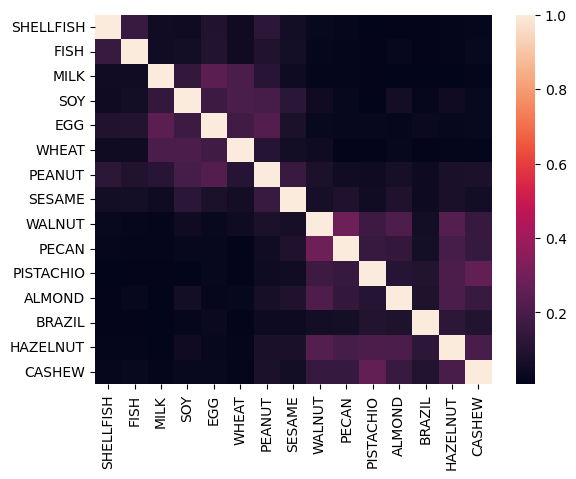

In [63]:
# Visualize this data with a heat map

heat_corr = start_clean.fillna(0).corr()
sns.heatmap(heat_corr);

In [64]:
# Find highest correlated allergens

all_df = all_df.rename(columns={0:"Correlation"})
all_df.dropna()
all_df.sort_values("Correlation").tail(25)

,,Correlation
EGG,PEANUT,0.221584
PEANUT,EGG,0.221584
WALNUT,HAZELNUT,0.225108
HAZELNUT,WALNUT,0.225108
EGG,MILK,0.243939
MILK,EGG,0.243939
PISTACHIO,CASHEW,0.257410
CASHEW,PISTACHIO,0.257410
PECAN,WALNUT,0.286995
WALNUT,PECAN,0.286995


In [65]:
all_df = all_df.rename(columns={0:"Correlation"})
all_df.dropna()
all_df.sort_values("Correlation").head(35)

,,Correlation
SOY,PISTACHIO,0.007575
PISTACHIO,SOY,0.007575
MILK,HAZELNUT,0.007654
HAZELNUT,MILK,0.007654
ALMOND,MILK,0.011014
MILK,ALMOND,0.011014
PISTACHIO,SHELLFISH,0.011102
SHELLFISH,PISTACHIO,0.011102
MILK,BRAZIL,0.011179
BRAZIL,MILK,0.011179


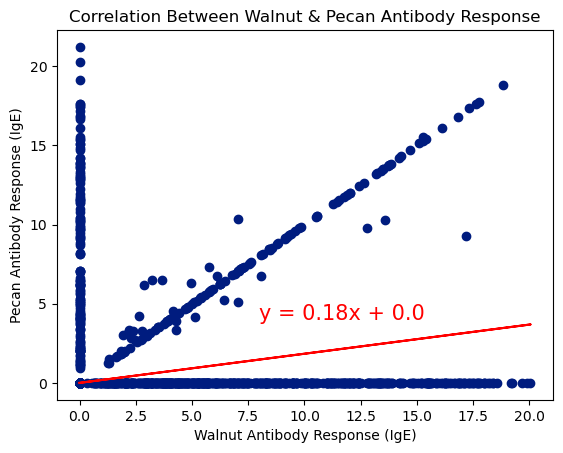

The correlation between both factors is 0.29


In [68]:
# Graph for the most correlated

x_values = ((start_clean['WALNUT']).fillna(0))
y_values = ((start_clean['PECAN']).fillna(0))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(8,4),fontsize=15,color="red")
plt.xlabel('Walnut Antibody Response (IgE)')
plt.ylabel('Pecan Antibody Response (IgE)')
plt.title("Correlation Between Walnut & Pecan Antibody Response")
plt.show()
correlation = sts.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

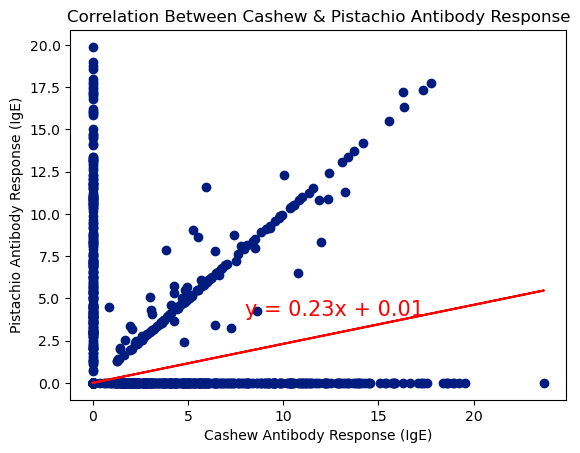

The correlation between both factors is 0.26


In [69]:
# Graph for the most correlated

x_values = ((start_clean['CASHEW']).fillna(0))
y_values = ((start_clean['PISTACHIO']).fillna(0))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(8,4),fontsize=15,color="red")
plt.xlabel('Cashew Antibody Response (IgE)')
plt.ylabel('Pistachio Antibody Response (IgE)')
plt.title("Correlation Between Cashew & Pistachio Antibody Response")
plt.show()
correlation = sts.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

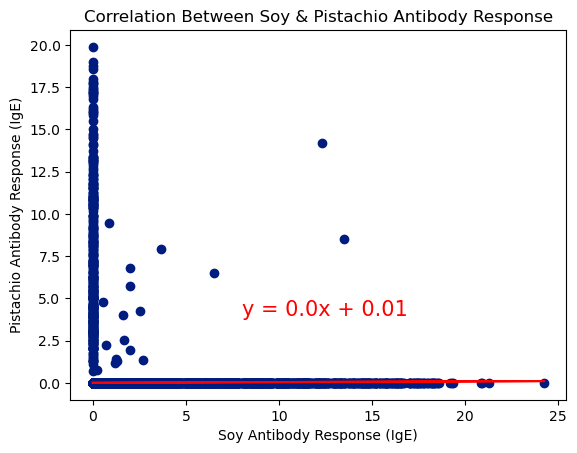

The correlation between both factors is 0.01


In [70]:
# Graph for the least correlated

x_values = ((start_clean['SOY']).fillna(0))
y_values = ((start_clean['PISTACHIO']).fillna(0))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(8,4),fontsize=15,color="red")
plt.xlabel('Soy Antibody Response (IgE)')
plt.ylabel('Pistachio Antibody Response (IgE)')
plt.title("Correlation Between Soy & Pistachio Antibody Response")
plt.show()
correlation = sts.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

<h1>Vivian's Part</h1>

In [72]:
egg_df_clean=get_allergen_df('egg')

nan_count=len(egg_df_clean[egg_df_clean['EGG_ALG_END'].isna()==True])

egg_df_clean.fillna(0.0,inplace=True)
print (f'\n{nan_count} number of NAs in the EGG_ALG_END column filled with zeros.\n')
egg_df_clean.head()


2763 number of NAs in the EGG_ALG_END column filled with zeros.



,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,AGE_START_YEARS,AGE_END_YEARS,EGG_ALG_START,EGG_ALG_END,SENSITIVITY_START_TAG,SENSITIVITY_END_TAG
0,61,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,0.194387,6.431211,1.349760,1.349760,Moderate,Moderate
1,169,2006,S0 - Male,R3 - Other,E0 - Non-Hispanic,0.019165,1.593429,0.810404,0.000000,Moderate,
2,190,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,0.114990,6.992471,1.434634,1.434634,Moderate,Moderate
3,198,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,0.016427,6.855578,2.275154,0.000000,Moderate,
4,363,1993,S0 - Male,R0 - White,E1 - Hispanic,8.260096,17.900068,13.524983,0.000000,High,


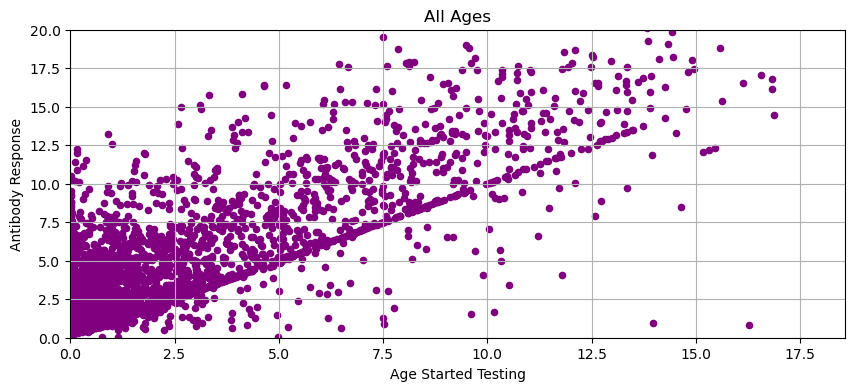

In [73]:
egg_df_clean.plot(kind="scatter", x="AGE_START_YEARS", y="EGG_ALG_START", grid=True,figsize=(10,4), color='purple')
plt.xlim(0)
plt.ylim(0, 20)
plt.title('All Ages')
plt.ylabel('Antibody Response')
plt.xlabel('Age Started Testing')
plt.savefig("output/egg_ages.png")

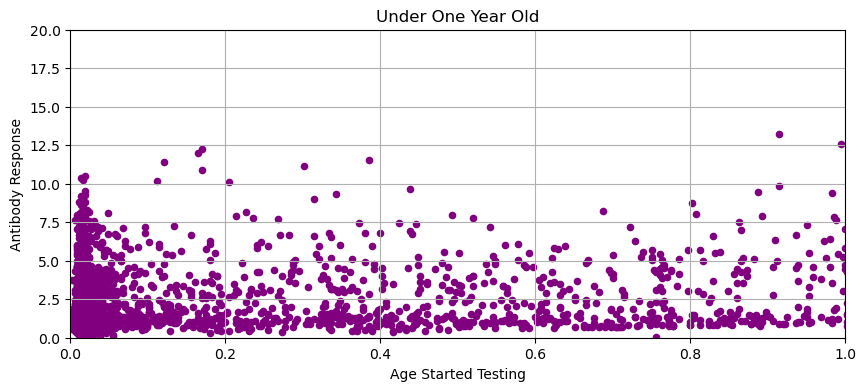

In [74]:
egg_df_clean.plot(kind="scatter", x="AGE_START_YEARS", y="EGG_ALG_START", grid=True,figsize=(10,4), color='purple')
plt.xlim(0,1)
plt.ylim(0, 20)
plt.title('Under One Year Old')
plt.ylabel('Antibody Response')
plt.xlabel('Age Started Testing')
plt.savefig("output/egg_underone.png")

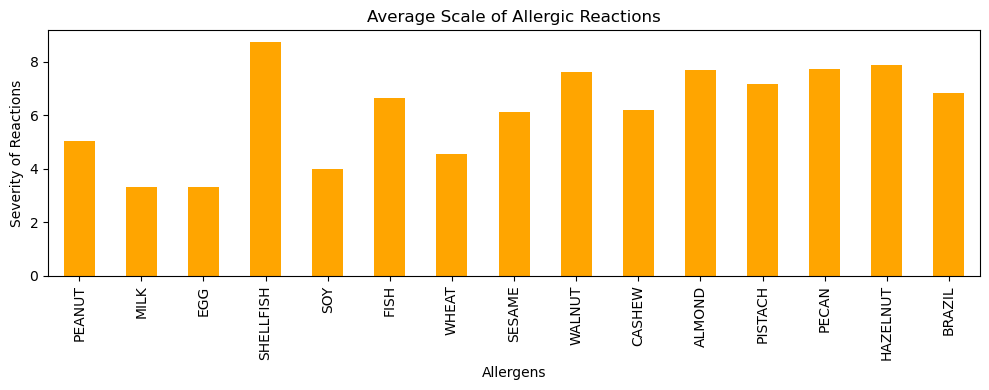

In [76]:
#Set designation for the mean of allergic reactions
allergy_mean= allergy_response_df['Mean']

#Create and display the plot
reaction_bar = allergy_mean.plot(kind="bar", figsize=(10,4),color='orange')
reaction_bar = plt.xlabel("Allergens")
reaction_bar = plt.ylabel("Severity of Reactions")
reaction_bar = plt.title("Average Scale of Allergic Reactions")
plt.tight_layout()
plt.savefig("output/average_reactions.png")

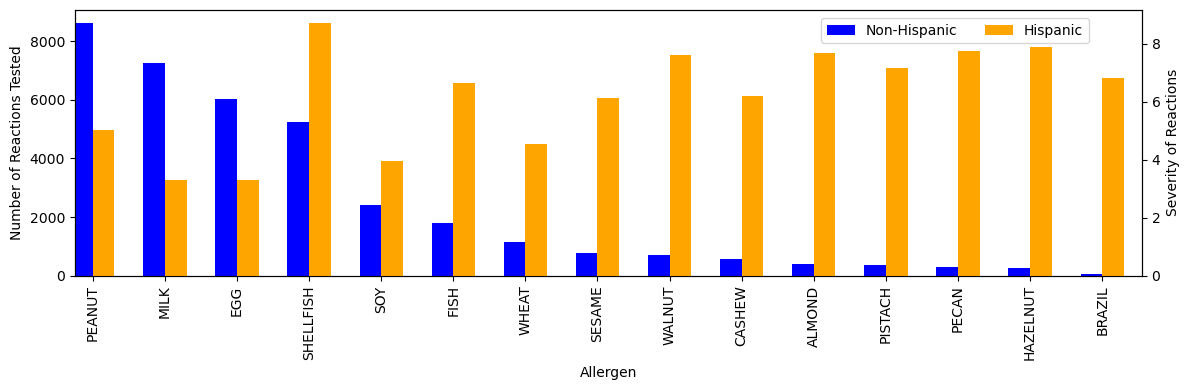

In [98]:
#Set up axis and add subplots
fig = plt.figure()

ax1 = fig.add_subplot()
ax2 = ax1.twinx()



#Set both Y labels
ax1.set_ylabel('Number of Reactions Tested')
ax2.set_ylabel('Severity of Reactions')

#Create the plots for number of tested kids and severity level of reactions
allergy_count= allergy_response_df['Count']
allergy_count.plot(kind='bar',color='blue',ax=ax1,position=1, figsize=(12,4), width=.3, label='Tested Kids')
allergy_mean.plot(kind='bar',color='orange',ax=ax2,position=0, figsize=(12,4), width=.3, label='Severity of Reactions')

#Combine legend for both values and display the plot
plt.figlegend(labels, loc = 'upper center', ncol=5, labelspacing=0., bbox_to_anchor=(0.8, .96))
plt.tight_layout()
plt.savefig("output/comparison_bar.png")


<h1>Lucia's Part</h1>

In [129]:

allergy_df_clean_agebin=allergy_df_clean_splitcols.copy()
allergy_df_clean_agebin['AGE_BIN'] = ''

#fill out age bins based on age start
allergy_df_clean_agebin['AGE_BIN'][allergy_df_clean_agebin["AGE_START_YEARS"] < 1] = 'A0-Infant'
allergy_df_clean_agebin['AGE_BIN'][(1 <= allergy_df_clean_agebin["AGE_START_YEARS"]) & (allergy_df_clean_agebin["AGE_START_YEARS"] < 3)] = 'A1-Toddler'
allergy_df_clean_agebin['AGE_BIN'][(3 <= allergy_df_clean_agebin["AGE_START_YEARS"]) & (allergy_df_clean_agebin["AGE_START_YEARS"] < 5)] = 'A2-Preschool'
allergy_df_clean_agebin['AGE_BIN'][(5 <= allergy_df_clean_agebin["AGE_START_YEARS"]) & (allergy_df_clean_agebin["AGE_START_YEARS"] < 13)] = 'A3-Grade School'
allergy_df_clean_agebin['AGE_BIN'][allergy_df_clean_agebin["AGE_START_YEARS"] >= 13] = 'A4-Highschool'

In [130]:
allergy_df_clean_agebin['AGE_BIN']

0               A0-Infant
1         A3-Grade School
2               A0-Infant
3              A1-Toddler
4               A0-Infant
               ...       
333195          A0-Infant
333196          A0-Infant
333197          A0-Infant
333198          A0-Infant
333199          A0-Infant
Name: AGE_BIN, Length: 332801, dtype: object

In [131]:
allergy_df_clean_agebin.groupby('AGE_BIN').count()['SUBJECT_ID']

AGE_BIN
A0-Infant          149825
A1-Toddler          36831
A2-Preschool        32010
A3-Grade School     95246
A4-Highschool       18889
Name: SUBJECT_ID, dtype: int64

In [132]:
#retrieve dataframe for patients with antibody response to milk
milk_df_clean=get_allergen_df('milk',allergy_df_clean_agebin)
milk_df_clean.head()

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,AGE_START_YEARS,AGE_END_YEARS,MILK_ALG_START,MILK_ALG_END,SENSITIVITY_START_TAG,SENSITIVITY_END_TAG
0,3,2006,S0 - Male,R0 - White,E1 - Hispanic,0.010951,6.726899,1.002053,1.002053,Moderate,Moderate
1,71,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,0.421629,5.133470,0.544832,0.544832,Low,Low
2,139,1999,S0 - Male,R0 - White,E0 - Non-Hispanic,7.671458,14.592745,7.671458,7.671458,High,High
3,198,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,0.016427,6.855578,0.334018,0.334018,Very Low,Very Low
4,214,2006,S0 - Male,R1 - Black,E0 - Non-Hispanic,0.079398,6.965092,0.123203,NaN,Very Low,


In [133]:
#milk_scatter_df = milk_df_clean.groupby('GENDER_FACTOR')
#milk_df_clean.plot(kind="scatter", x="AGE_START_YEARS", y="MILK_ALG_START", grid=True, edgecolors="black")
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, annotate_xy):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Create Plot
    plt.scatter(x_values,y_values, marker="o", facecolors="lightskyblue", edgecolors="blue")
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,annotate_xy,fontsize=15,color="red")
    plt.grid(True)
    print(f"The r-value is: {rvalue}")

The r-value is: 0.847820920858725


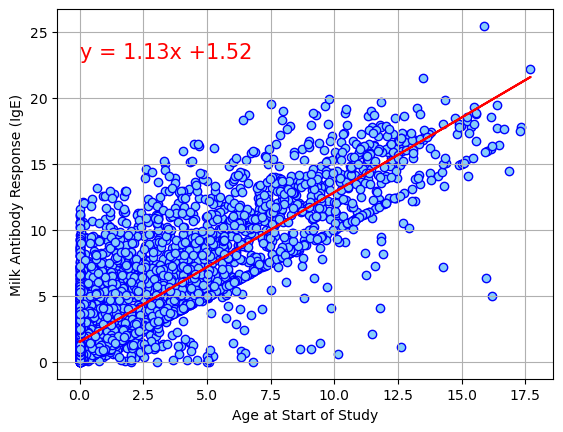

In [134]:
#find correlation between Milk Antibody Response and patient's Age at start of study
createLinearRegressionPlot(milk_df_clean["AGE_START_YEARS"], milk_df_clean["MILK_ALG_START"], "Age at Start of Study", "Milk Antibody Response (IgE)",(0,23))
plt.savefig("output/milk_response_and_age_correlation.png")
plt.show()

The r-value is: -0.8323972455421197


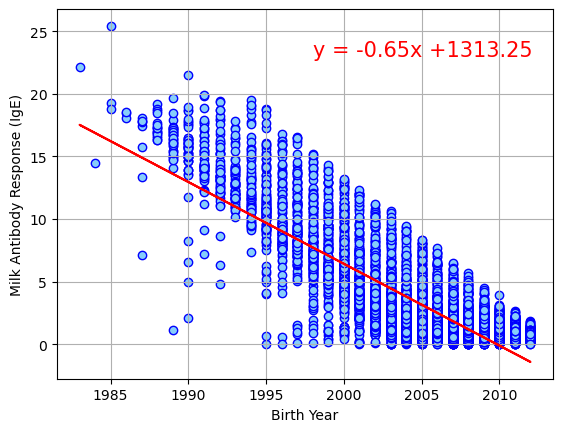

In [135]:
#find correlation between Milk Antibody Response and patient's Birth Year
createLinearRegressionPlot(milk_df_clean["BIRTH_YEAR"], milk_df_clean["MILK_ALG_START"], "Birth Year", "Milk Antibody Response (IgE)",(1998,23))
plt.savefig("output/milkresponse_and_birthyear_correlation.png")
plt.show()

In [136]:
milk_df_clean=get_allergen_df('milk',allergy_df_clean_agebin,1)
milk_df_clean.head()

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,AGE_START_YEARS,AGE_END_YEARS,MILK_ALG_START,MILK_ALG_END,AGE_BIN,SENSITIVITY_START_TAG,SENSITIVITY_END_TAG
0,3,2006,S0 - Male,R0 - White,E1 - Hispanic,0.010951,6.726899,1.002053,1.002053,A0-Infant,Moderate,Moderate
1,71,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,0.421629,5.133470,0.544832,0.544832,A0-Infant,Low,Low
2,139,1999,S0 - Male,R0 - White,E0 - Non-Hispanic,7.671458,14.592745,7.671458,7.671458,A3-Grade School,High,High
3,198,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,0.016427,6.855578,0.334018,0.334018,A0-Infant,Very Low,Very Low
4,214,2006,S0 - Male,R1 - Black,E0 - Non-Hispanic,0.079398,6.965092,0.123203,NaN,A0-Infant,Very Low,


In [137]:
milk_infant = milk_df_clean.loc[milk_df_clean['AGE_BIN'] == 'A0-Infant']
milk_toddler = milk_df_clean.loc[milk_df_clean['AGE_BIN'] == 'A1-Toddler']
milk_preschool = milk_df_clean.loc[milk_df_clean['AGE_BIN'] == 'A2-Preschool']
milk_gradeschool = milk_df_clean.loc[milk_df_clean['AGE_BIN'] == 'A3-Grade School']
milk_highschool = milk_df_clean.loc[milk_df_clean['AGE_BIN'] == 'A4-Highschool']

print(f"Total number of kids sensitive to milk: {len(milk_df_clean)}")
print(f"Number of infants sensitive to milk: {len(milk_infant)}")
print(f"Number of toddlers sensitive to milk: {len(milk_toddler)}")
print(f"Number of preschoolers sensitive to milk: {len(milk_preschool)}")
print(f"Number of grade schoolers (K-8) sensitive to milk: {len(milk_gradeschool)}")
print(f"Number of highschoolers sensitive to milk: {len(milk_highschool)}")

Total number of kids sensitive to milk: 7255
Number of infants sensitive to milk: 5066
Number of toddlers sensitive to milk: 888
Number of preschoolers sensitive to milk: 425
Number of grade schoolers (K-8) sensitive to milk: 801
Number of highschoolers sensitive to milk: 75


In [138]:
study_infant = allergy_df_clean_agebin.loc[allergy_df_clean_agebin['AGE_BIN'] == 'A0-Infant']
study_toddler = allergy_df_clean_agebin.loc[allergy_df_clean_agebin['AGE_BIN'] == 'A1-Toddler']
study_preschool = allergy_df_clean_agebin.loc[allergy_df_clean_agebin['AGE_BIN'] == 'A2-Preschool']
study_gradeschool = allergy_df_clean_agebin.loc[allergy_df_clean_agebin['AGE_BIN'] == 'A3-Grade School']
study_highschool = allergy_df_clean_agebin.loc[allergy_df_clean_agebin['AGE_BIN'] == 'A4-Highschool']

print(f"Total number of kids in study: {len(allergy_df_clean_agebin)}")
print(f"Number of infants in study: {len(study_infant)}")
print(f"Number of toddlers in study: {len(study_toddler)}")
print(f"Number of preschoolers in study: {len(study_preschool)}")
print(f"Number of grade school kids (K-8) in study: {len(study_gradeschool)}")
print(f"Number of highschoolers in study: {len(study_highschool)}")

Total number of kids in study: 332801
Number of infants in study: 149825
Number of toddlers in study: 36831
Number of preschoolers in study: 32010
Number of grade school kids (K-8) in study: 95246
Number of highschoolers in study: 18889


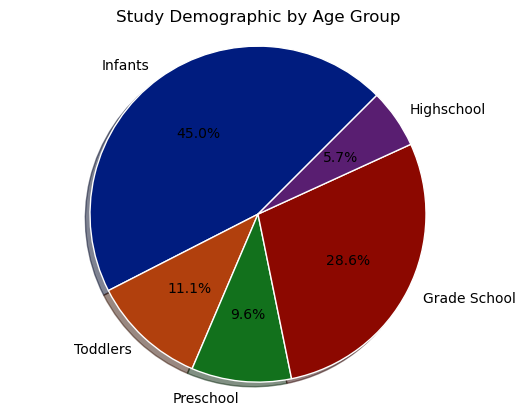

In [139]:
plt.title("Study Demographic by Age Group")
age_bins = ["Infants", "Toddlers", "Preschool", "Grade School", "Highschool"]
kids_in_study = [len(study_infant), len(study_toddler), len(study_preschool), len(study_gradeschool), len(study_highschool)]
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "orange"]
explode = (0, 0, 0, 0, 0)
plt.pie(kids_in_study, explode=explode, labels=age_bins, 
        autopct="%1.1f%%", shadow=True, startangle=45, 
        wedgeprops = {"edgecolor" : "white",
                      'linewidth': 1,
                      'antialiased': True})
plt.axis("equal")
plt.savefig("output/demographic_by_ages.png")
plt.show()

In [153]:
#create the race summary
race_df=pd.DataFrame(allergy_df_clean_agebin.groupby('RACE_FACTOR').count()['SUBJECT_ID'])
race_df.columns=['Total Participants']
race_df.index.names=['Race']
race_df

,Total Participants
Race,
R0 - White,183093
R1 - Black,97674
R2 - Asian or Pacific Islander,9138
R3 - Other,1986
R4 - Unknown,40910


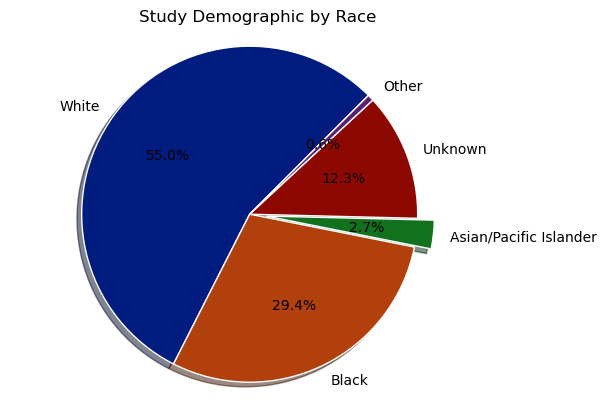

In [141]:
plt.title("Study Demographic by Race")
races = ["White", "Black", "Asian/Pacific Islander", "Unknown", "Other"]
subjects = [183276, 97781, 9148, 40937, 2005]
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "orange"]
explode = (0, 0, 0.1, 0, 0)
plt.pie(subjects, explode=explode, labels=races, 
        autopct="%1.1f%%", shadow=True, startangle=45, 
        wedgeprops = {"edgecolor" : "white",
                      'linewidth': 1,
                      'antialiased': True})
plt.axis("equal")
plt.savefig("output/demographic_by_race.png")
plt.show()

In [152]:
count_list=[]
mean_list=[]
max_list=[]
min_list=[]
percent_population_list=[]

allergen_stats=allergy_df_clean_agebin.describe()
total_subjects=allergy_df_clean_agebin.count()['SUBJECT_ID']

allergen_list=allergy_df_clean_agebin.columns[9:-9]
allergen_list=[x for x in allergen_list if 'ALG_START' in x]

for x in allergen_list:
    count=allergen_stats.loc['count',x]
    count_list.append(count)
    mean=round(allergen_stats.loc['mean',x],2)
    mean_list.append(mean)
    max_num = round(allergen_stats.loc['max',x],2)
    max_list.append(max_num)
    min_num = round(allergen_stats.loc['min',x],2)
    min_list.append(min_num)
    pop_percent=(allergen_stats.loc['count',x]/total_subjects*100).round(2).astype(str)+'%'
    percent_population_list.append(pop_percent)

allergy_response_df=pd.DataFrame(data={'Count':count_list,
                                       'Mean':mean_list,
                                       'Max':max_list,
                                       'Min':min_list,
                                       'Percent of Population':percent_population_list},
                                 index=[allergen_name[:-10] for allergen_name in allergen_list])

print('\n----------------------------------')
print('---- Allergy Response Summary -----')
print('----------------------------------')
allergy_response_df.index.names=['Allergen']
allergy_response_df.sort_values(by=['Count','Mean'],ascending=False)


----------------------------------
---- Allergy Response Summary -----
----------------------------------


,Count,Mean,Max,Min,Percent of Population
Allergen,,,,,
PEANUT,8640.0,5.03,21.52,0.00,2.6%
MILK,7255.0,3.31,25.43,0.00,2.18%
EGG,6044.0,3.30,22.16,0.02,1.82%
SHELLFISH,5240.0,8.73,24.30,0.09,1.57%
SOY,2411.0,3.97,24.22,0.03,0.72%
FISH,1793.0,6.64,22.50,0.08,0.54%
WHEAT,1144.0,4.55,22.84,0.16,0.34%
SESAME,765.0,6.13,22.72,0.49,0.23%
WALNUT,704.0,7.60,20.05,0.34,0.21%


In [148]:
total_white = allergy_df_clean_agebin[allergy_df_clean_agebin['RACE_FACTOR']=='R0 - White'].count()['SUBJECT_ID']
white_percentage = round(total_white/total_subjects*100,2)
total_black = allergy_df_clean_agebin[allergy_df_clean_agebin['RACE_FACTOR']=='R1 - Black'].count()['SUBJECT_ID']
black_percentage = round(total_black/total_subjects*100,2)
total_asian = allergy_df_clean_agebin[allergy_df_clean_agebin['RACE_FACTOR']=='R2 - Asian or Pacific Islander'].count()['SUBJECT_ID']
asian_percentage = round(total_asian/total_subjects*100,2)
total_other = allergy_df_clean_agebin[allergy_df_clean_agebin['RACE_FACTOR']=='R3 - Other'].count()['SUBJECT_ID']
other_percentage = round(total_other/total_subjects*100,2)
total_unknown = allergy_df_clean_agebin[allergy_df_clean_agebin['RACE_FACTOR']=='R4 - Unknown'].count()['SUBJECT_ID']
unknown_percentage = round(total_unknown/total_subjects*100,2)
print('----   Race Summary  ----')
print (f'Total Participants : {total_subjects}')
print('-'*35)
print (f'Total number of White Participants : {total_white}')
print (f'Percentage of White Participants : {white_percentage}%')
print('-'*35)
print (f'Total number of Black Participants : {total_black}')
print (f'Percentage of Black Participants : {black_percentage}%')
print('-'*35)
print (f'Total number of Asian or Pacific Islander Participants : {total_asian}')
print (f'Percentage of Asian or Pacific Islander Participants : {asian_percentage}%')
print('-'*35)
print (f'Total number of Other Race Participants : {total_other}')
print (f'Percentage of Other Race Participants : {other_percentage}%')
print('-'*35)
print (f'Total number of Unknown Race Participants : {total_unknown}')
print (f'Percentage of Unknown Race Participants : {unknown_percentage}%')


----   Race Summary  ----
Total Participants : 332801
-----------------------------------
Total number of White Participants : 183093
Percentage of White Participants : 55.02%
-----------------------------------
Total number of Black Participants : 97674
Percentage of Black Participants : 29.35%
-----------------------------------
Total number of Asian or Pacific Islander Participants : 9138
Percentage of Asian or Pacific Islander Participants : 2.75%
-----------------------------------
Total number of Other Race Participants : 1986
Percentage of Other Race Participants : 0.6%
-----------------------------------
Total number of Unknown Race Participants : 40910
Percentage of Unknown Race Participants : 12.29%


In [154]:
percentages = [white_percentage, black_percentage, asian_percentage, other_percentage, unknown_percentage]
race_df["Total Participant %"] = percentages
race_df["Total Participant %"] = race_df["Total Participant %"].map("{:,.2f}%".format)
race_df

,Total Participants,Total Participant %
Race,,
R0 - White,183093,55.02%
R1 - Black,97674,29.35%
R2 - Asian or Pacific Islander,9138,2.75%
R3 - Other,1986,0.60%
R4 - Unknown,40910,12.29%


In [156]:
peanut_df_clean = get_allergen_df('peanut',allergy_df_clean_agebin,1)
egg_df_clean = get_allergen_df('egg',allergy_df_clean_agebin,1)
shellfish_df_clean = get_allergen_df('shellfish',allergy_df_clean_agebin,1)
soy_df_clean = get_allergen_df('soy',allergy_df_clean_agebin,1)
fish_df_clean = get_allergen_df('fish',allergy_df_clean_agebin,1)
wheat_df_clean = get_allergen_df('wheat',allergy_df_clean_agebin,1)

In [157]:
#get stats for peanut allergy by race
peanut_white = round(peanut_df_clean[peanut_df_clean['RACE_FACTOR']=='R0 - White'].count()['SUBJECT_ID']/total_white*100,2)
peanut_black = round(peanut_df_clean[peanut_df_clean['RACE_FACTOR']=='R1 - Black'].count()['SUBJECT_ID']/total_black*100,2)
peanut_asian = round(peanut_df_clean[peanut_df_clean['RACE_FACTOR']=='R2 - Asian or Pacific Islander'].count()['SUBJECT_ID']/total_asian*100,2)
peanut_other = round(peanut_df_clean[peanut_df_clean['RACE_FACTOR']=='R3 - Other'].count()['SUBJECT_ID']/total_other*100,2)
peanut_unknown = round(peanut_df_clean[peanut_df_clean['RACE_FACTOR']=='R4 - Unknown'].count()['SUBJECT_ID']/total_unknown*100,2)
peanut_percentages = [peanut_white,peanut_black,peanut_asian,peanut_other,peanut_unknown]

In [161]:
#get stats for milk allergy by race
milk_white = round(milk_df_clean[milk_df_clean['RACE_FACTOR']=='R0 - White'].count()['SUBJECT_ID']/total_white*100,2)
milk_black = round(milk_df_clean[milk_df_clean['RACE_FACTOR']=='R1 - Black'].count()['SUBJECT_ID']/total_black*100,2)
milk_asian = round(milk_df_clean[milk_df_clean['RACE_FACTOR']=='R2 - Asian or Pacific Islander'].count()['SUBJECT_ID']/total_asian*100,2)
milk_other = round(milk_df_clean[milk_df_clean['RACE_FACTOR']=='R3 - Other'].count()['SUBJECT_ID']/total_other*100,2)
milk_unknown = round(milk_df_clean[milk_df_clean['RACE_FACTOR']=='R4 - Unknown'].count()['SUBJECT_ID']/total_unknown*100,2)
milk_percentages = [milk_white,milk_black,milk_asian,milk_other,milk_unknown]

In [162]:
#get stats for egg allergy by race
egg_white = round(egg_df_clean[egg_df_clean['RACE_FACTOR']=='R0 - White'].count()['SUBJECT_ID']/total_white*100,2)
egg_black = round(egg_df_clean[egg_df_clean['RACE_FACTOR']=='R1 - Black'].count()['SUBJECT_ID']/total_black*100,2)
egg_asian = round(egg_df_clean[egg_df_clean['RACE_FACTOR']=='R2 - Asian or Pacific Islander'].count()['SUBJECT_ID']/total_asian*100,2)
egg_other = round(egg_df_clean[egg_df_clean['RACE_FACTOR']=='R3 - Other'].count()['SUBJECT_ID']/total_other*100,2)
egg_unknown = round(egg_df_clean[egg_df_clean['RACE_FACTOR']=='R4 - Unknown'].count()['SUBJECT_ID']/total_unknown*100,2)
egg_percentages = [egg_white,egg_black,egg_asian,egg_other,egg_unknown]

In [163]:
#get stats for shellfish allergy by race
shellfish_white = round(shellfish_df_clean[shellfish_df_clean['RACE_FACTOR']=='R0 - White'].count()['SUBJECT_ID']/total_white*100,2)
shellfish_black = round(shellfish_df_clean[shellfish_df_clean['RACE_FACTOR']=='R1 - Black'].count()['SUBJECT_ID']/total_black*100,2)
shellfish_asian = round(shellfish_df_clean[shellfish_df_clean['RACE_FACTOR']=='R2 - Asian or Pacific Islander'].count()['SUBJECT_ID']/total_asian*100,2)
shellfish_other = round(shellfish_df_clean[shellfish_df_clean['RACE_FACTOR']=='R3 - Other'].count()['SUBJECT_ID']/total_other*100,2)
shellfish_unknown = round(shellfish_df_clean[shellfish_df_clean['RACE_FACTOR']=='R4 - Unknown'].count()['SUBJECT_ID']/total_unknown*100,2)
shellfish_percentages = [shellfish_white,shellfish_black,shellfish_asian,shellfish_other,shellfish_unknown]

In [164]:
#get stats for soy  by race
soy_white = round(soy_df_clean[soy_df_clean['RACE_FACTOR']=='R0 - White'].count()['SUBJECT_ID']/total_white*100,2)
soy_black = round(soy_df_clean[soy_df_clean['RACE_FACTOR']=='R1 - Black'].count()['SUBJECT_ID']/total_black*100,2)
soy_asian = round(soy_df_clean[soy_df_clean['RACE_FACTOR']=='R2 - Asian or Pacific Islander'].count()['SUBJECT_ID']/total_asian*100,2)
soy_other = round(soy_df_clean[soy_df_clean['RACE_FACTOR']=='R3 - Other'].count()['SUBJECT_ID']/total_other*100,2)
soy_unknown = round(soy_df_clean[soy_df_clean['RACE_FACTOR']=='R4 - Unknown'].count()['SUBJECT_ID']/total_unknown*100,2)
soy_percentages = [soy_white,soy_black,soy_asian,soy_other,soy_unknown]

In [165]:
#get stats for fish by race
fish_white = round(fish_df_clean[fish_df_clean['RACE_FACTOR']=='R0 - White'].count()['SUBJECT_ID']/total_white*100,2)
fish_black = round(fish_df_clean[fish_df_clean['RACE_FACTOR']=='R1 - Black'].count()['SUBJECT_ID']/total_black*100,2)
fish_asian = round(fish_df_clean[fish_df_clean['RACE_FACTOR']=='R2 - Asian or Pacific Islander'].count()['SUBJECT_ID']/total_asian*100,2)
fish_other = round(fish_df_clean[fish_df_clean['RACE_FACTOR']=='R3 - Other'].count()['SUBJECT_ID']/total_other*100,2)
fish_unknown = round(fish_df_clean[fish_df_clean['RACE_FACTOR']=='R4 - Unknown'].count()['SUBJECT_ID']/total_unknown*100,2)
fish_percentages = [fish_white,fish_black,fish_asian,fish_other,fish_unknown]

In [166]:
#get stats for wheat by race
wheat_white = round(wheat_df_clean[wheat_df_clean['RACE_FACTOR']=='R0 - White'].count()['SUBJECT_ID']/total_white*100,2)
wheat_black = round(wheat_df_clean[wheat_df_clean['RACE_FACTOR']=='R1 - Black'].count()['SUBJECT_ID']/total_black*100,2)
wheat_asian = round(wheat_df_clean[wheat_df_clean['RACE_FACTOR']=='R2 - Asian or Pacific Islander'].count()['SUBJECT_ID']/total_asian*100,2)
wheat_other = round(wheat_df_clean[wheat_df_clean['RACE_FACTOR']=='R3 - Other'].count()['SUBJECT_ID']/total_other*100,2)
wheat_unknown = round(wheat_df_clean[wheat_df_clean['RACE_FACTOR']=='R4 - Unknown'].count()['SUBJECT_ID']/total_unknown*100,2)
wheat_percentages = [wheat_white,wheat_black,wheat_asian,wheat_other,wheat_unknown]

In [167]:
race_df["Peanut Allergy %"] = peanut_percentages
race_df["Milk Allergy %"] = milk_percentages
race_df["Egg Allergy %"] = egg_percentages
race_df["Shellfish Allergy %"] = shellfish_percentages
race_df["Soy Allergy %"] = soy_percentages
race_df["Fish Allergy %"] = fish_percentages
race_df["Wheat Allergy %"] = wheat_percentages

race_df

,Total Participants,Total Participant %,Peanut Allergy %,Milk Allergy %,Egg Allergy %,Shellfish Allergy %,Soy Allergy %,Fish Allergy %,Wheat Allergy %
Race,,,,,,,,,
R0 - White,183093,55.02%,2.52,2.34,1.82,0.86,0.80,0.29,0.34
R1 - Black,97674,29.35%,2.73,1.84,1.53,3.00,0.58,0.99,0.32
R2 - Asian or Pacific Islander,9138,2.75%,5.44,3.63,5.25,3.20,1.53,1.37,0.96
R3 - Other,1986,0.60%,2.97,3.58,2.77,1.21,1.41,0.65,0.45
R4 - Unknown,40910,12.29%,1.95,1.87,1.67,1.02,0.53,0.39,0.29


In [169]:
allergy_chart_df = race_df.drop(columns=['Total Participants', 'Total Participant %'])
allergy_chart_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, R0 - White to R4 - Unknown
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Peanut Allergy %     5 non-null      float64
 1   Milk Allergy %       5 non-null      float64
 2   Egg Allergy %        5 non-null      float64
 3   Shellfish Allergy %  5 non-null      float64
 4   Soy Allergy %        5 non-null      float64
 5   Fish Allergy %       5 non-null      float64
 6   Wheat Allergy %      5 non-null      float64
dtypes: float64(7)
memory usage: 320.0+ bytes


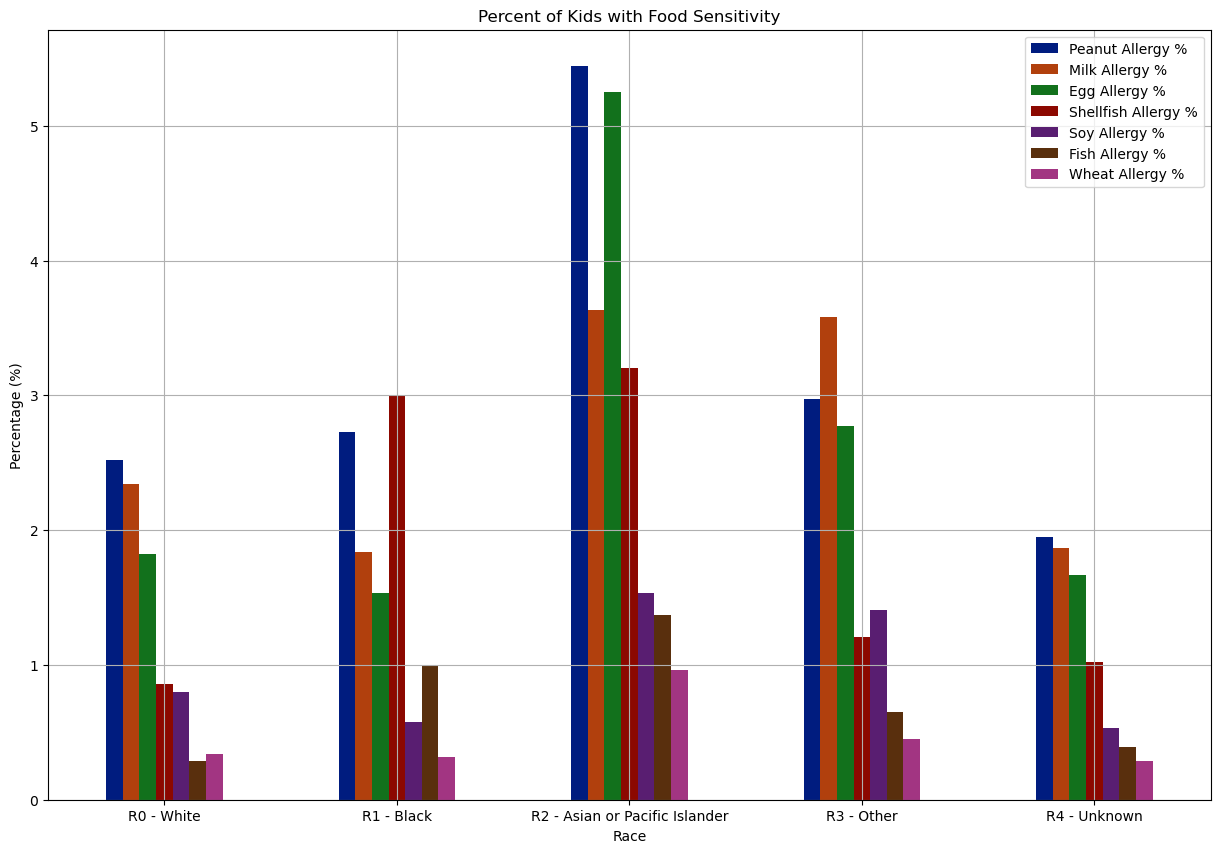

In [171]:
multi_plot = allergy_chart_df.plot(kind="bar", align = "center", figsize=(15,10))
xticklabels = allergy_chart_df.index
multi_plot.set_xticklabels(xticklabels, rotation=0, rotation_mode="anchor", ha="center", wrap=True)

plt.title("Percent of Kids with Food Sensitivity")
plt.xlabel("Race")
plt.ylabel("Percentage (%)")
plt.grid(True)
plt.savefig("output/percent_by_race.png")

plt.show()

In [172]:
#get stats for peanut allergy by age bin
peanut_infant = round(peanut_df_clean[peanut_df_clean['AGE_BIN']=='A0-Infant'].count()['SUBJECT_ID']/len(study_infant)*100,2)
peanut_toddler = round(peanut_df_clean[peanut_df_clean['AGE_BIN']=='A1-Toddler'].count()['SUBJECT_ID']/len(study_toddler)*100,2)
peanut_preschool = round(peanut_df_clean[peanut_df_clean['AGE_BIN']=='A2-Preschool'].count()['SUBJECT_ID']/len(study_preschool)*100,2)
peanut_gradeschool = round(peanut_df_clean[peanut_df_clean['AGE_BIN']=='A3-Grade School'].count()['SUBJECT_ID']/len(study_gradeschool)*100,2)
peanut_highschool = round(peanut_df_clean[peanut_df_clean['AGE_BIN']=='A4-Highschool'].count()['SUBJECT_ID']/len(study_highschool)*100,2)
peanut_stat = [peanut_infant,peanut_toddler,peanut_preschool,peanut_gradeschool,peanut_highschool]

In [173]:
#get stats for milk allergy by age bin
milk_infant_stat = round(len(milk_infant)/len(study_infant)*100,2)
milk_toddler_stat = round(len(milk_toddler)/len(study_toddler)*100,2)
milk_preschool_stat = round(len(milk_preschool)/len(study_preschool)*100,2)
milk_gradeschool_stat = round(len(milk_gradeschool)/len(study_gradeschool)*100,2)
milk_highschool_stat = round(len(milk_highschool)/len(study_highschool)*100,2)
milk_stat = [milk_infant_stat,milk_toddler_stat,milk_preschool_stat,milk_gradeschool_stat,milk_highschool_stat]

In [174]:
#get stats for egg allergy by age bin
egg_infant = round(egg_df_clean[egg_df_clean['AGE_BIN']=='A0-Infant'].count()['SUBJECT_ID']/len(study_infant)*100,2)
egg_toddler = round(egg_df_clean[egg_df_clean['AGE_BIN']=='A1-Toddler'].count()['SUBJECT_ID']/len(study_toddler)*100,2)
egg_preschool = round(egg_df_clean[egg_df_clean['AGE_BIN']=='A2-Preschool'].count()['SUBJECT_ID']/len(study_preschool)*100,2)
egg_gradeschool = round(egg_df_clean[egg_df_clean['AGE_BIN']=='A3-Grade School'].count()['SUBJECT_ID']/len(study_gradeschool)*100,2)
egg_highschool = round(egg_df_clean[egg_df_clean['AGE_BIN']=='A4-Highschool'].count()['SUBJECT_ID']/len(study_highschool)*100,2)
egg_stat = [egg_infant,egg_toddler,egg_preschool,egg_gradeschool,egg_highschool]

In [175]:
#get stats for shellfish allergy by age bin
shellfish_infant = round(shellfish_df_clean[shellfish_df_clean['AGE_BIN']=='A0-Infant'].count()['SUBJECT_ID']/len(study_infant)*100,2)
shellfish_toddler = round(shellfish_df_clean[shellfish_df_clean['AGE_BIN']=='A1-Toddler'].count()['SUBJECT_ID']/len(study_toddler)*100,2)
shellfish_preschool = round(shellfish_df_clean[shellfish_df_clean['AGE_BIN']=='A2-Preschool'].count()['SUBJECT_ID']/len(study_preschool)*100,2)
shellfish_gradeschool = round(shellfish_df_clean[shellfish_df_clean['AGE_BIN']=='A3-Grade School'].count()['SUBJECT_ID']/len(study_gradeschool)*100,2)
shellfish_highschool = round(shellfish_df_clean[shellfish_df_clean['AGE_BIN']=='A4-Highschool'].count()['SUBJECT_ID']/len(study_highschool)*100,2)
shellfish_stat = [shellfish_infant,shellfish_toddler,shellfish_preschool,shellfish_gradeschool,shellfish_highschool]

In [176]:
#get stats for soy allergy by age bin
soy_infant = round(soy_df_clean[soy_df_clean['AGE_BIN']=='A0-Infant'].count()['SUBJECT_ID']/len(study_infant)*100,2)
soy_toddler = round(soy_df_clean[soy_df_clean['AGE_BIN']=='A1-Toddler'].count()['SUBJECT_ID']/len(study_toddler)*100,2)
soy_preschool = round(soy_df_clean[soy_df_clean['AGE_BIN']=='A2-Preschool'].count()['SUBJECT_ID']/len(study_preschool)*100,2)
soy_gradeschool = round(soy_df_clean[soy_df_clean['AGE_BIN']=='A3-Grade School'].count()['SUBJECT_ID']/len(study_gradeschool)*100,2)
soy_highschool = round(soy_df_clean[soy_df_clean['AGE_BIN']=='A4-Highschool'].count()['SUBJECT_ID']/len(study_highschool)*100,2)
soy_stat = [soy_infant,soy_toddler,soy_preschool,soy_gradeschool,soy_highschool]

In [177]:
#get stats for fish allergy by age bin
fish_infant = round(fish_df_clean[fish_df_clean['AGE_BIN']=='A0-Infant'].count()['SUBJECT_ID']/len(study_infant)*100,2)
fish_toddler = round(fish_df_clean[fish_df_clean['AGE_BIN']=='A1-Toddler'].count()['SUBJECT_ID']/len(study_toddler)*100,2)
fish_preschool = round(fish_df_clean[fish_df_clean['AGE_BIN']=='A2-Preschool'].count()['SUBJECT_ID']/len(study_preschool)*100,2)
fish_gradeschool = round(fish_df_clean[fish_df_clean['AGE_BIN']=='A3-Grade School'].count()['SUBJECT_ID']/len(study_gradeschool)*100,2)
fish_highschool = round(fish_df_clean[fish_df_clean['AGE_BIN']=='A4-Highschool'].count()['SUBJECT_ID']/len(study_highschool)*100,2)
fish_stat = [fish_infant,fish_toddler,fish_preschool,fish_gradeschool,fish_highschool]

In [178]:
#get stats for wheat allergy by age bin
wheat_infant = round(wheat_df_clean[wheat_df_clean['AGE_BIN']=='A0-Infant'].count()['SUBJECT_ID']/len(study_infant)*100,2)
wheat_toddler = round(wheat_df_clean[wheat_df_clean['AGE_BIN']=='A1-Toddler'].count()['SUBJECT_ID']/len(study_toddler)*100,2)
wheat_preschool = round(wheat_df_clean[wheat_df_clean['AGE_BIN']=='A2-Preschool'].count()['SUBJECT_ID']/len(study_preschool)*100,2)
wheat_gradeschool = round(wheat_df_clean[wheat_df_clean['AGE_BIN']=='A3-Grade School'].count()['SUBJECT_ID']/len(study_gradeschool)*100,2)
wheat_highschool = round(wheat_df_clean[wheat_df_clean['AGE_BIN']=='A4-Highschool'].count()['SUBJECT_ID']/len(study_highschool)*100,2)
wheat_stat = [wheat_infant,wheat_toddler,wheat_preschool,wheat_gradeschool,wheat_highschool]

In [179]:
age_df=pd.DataFrame(allergy_df_clean_agebin.groupby('AGE_BIN').count()['SUBJECT_ID'])
age_df.columns=['Total Participants']
age_df.index.names=['Age Bin']
age_df

,Total Participants
Age Bin,
A0-Infant,149825
A1-Toddler,36831
A2-Preschool,32010
A3-Grade School,95246
A4-Highschool,18889


In [181]:
age_df["Total Participant %"]=allergy_df_clean_agebin.AGE_BIN.value_counts(normalize=True)*100
age_df["Peanut Allergy %"] = peanut_stat
age_df["Milk Allergy %"] = milk_stat
age_df["Egg Allergy %"] = egg_stat
age_df["Shellfish Allergy %"] = shellfish_stat
age_df["Soy Allergy %"] = soy_stat
age_df["Fish Allergy %"] = fish_stat
age_df["Wheat Allergy %"] = wheat_stat
age_df

,Total Participants,Total Participant %,Peanut Allergy %,Milk Allergy %,Egg Allergy %,Shellfish Allergy %,Soy Allergy %,Fish Allergy %,Wheat Allergy %
Age Bin,,,,,,,,,
A0-Infant,149825,45.019396,3.21,3.38,2.76,1.31,1.09,0.56,0.46
A1-Toddler,36831,11.066974,3.51,2.41,2.42,1.79,0.85,0.74,0.48
A2-Preschool,32010,9.618361,2.35,1.33,1.12,1.59,0.43,0.45,0.27
A3-Grade School,95246,28.619505,1.70,0.84,0.63,1.86,0.31,0.48,0.18
A4-Highschool,18889,5.675764,0.89,0.40,0.28,1.73,0.19,0.42,0.10


In [182]:
age_chart_df = age_df.drop(columns=['Total Participants', 'Total Participant %'])

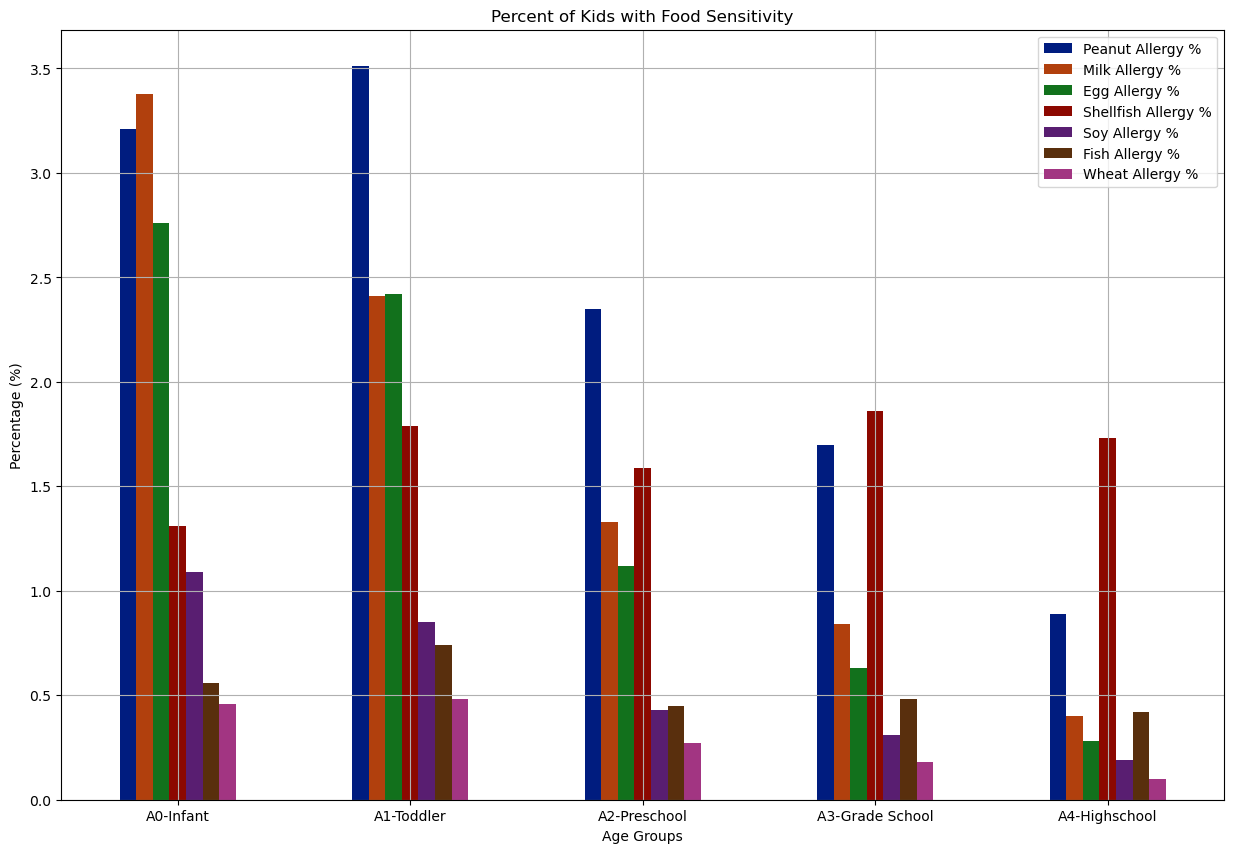

In [184]:
age_plot = age_chart_df.plot(kind="bar", align = "center", figsize=(15,10))
xticklabels = age_chart_df.index
age_plot.set_xticklabels(xticklabels, rotation=0, rotation_mode="anchor", ha="center", wrap=True)

plt.title("Percent of Kids with Food Sensitivity")
plt.xlabel("Age Groups")
plt.ylabel("Percentage (%)")
plt.grid(True)
plt.savefig("output/percent_by_age.png")

plt.show()

In [185]:
#create same graph for gender. first get total number of males/females
study_male = allergy_df_clean.loc[allergy_df_clean['GENDER_FACTOR'] == 'S0 - Male']
study_female = allergy_df_clean.loc[allergy_df_clean['GENDER_FACTOR'] == 'S1 - Female']

print('----   Gender Summary  ----')
print (f'Total number of Male Participants : {len(study_male)}')
print (f'Total number of Female Participants : {len(study_female)}')

----   Gender Summary  ----
Total number of Male Participants : 168816
Total number of Female Participants : 163985


In [186]:
#get stats for peanut allergy by gender
peanut_male = round(peanut_df_clean[peanut_df_clean['GENDER_FACTOR'] == 'S0 - Male'].count()['SUBJECT_ID']/len(study_male)*100,2)
peanut_female = round(peanut_df_clean[peanut_df_clean['GENDER_FACTOR'] == 'S1 - Female'].count()['SUBJECT_ID']/len(study_female)*100,2)
peanut_gender = [peanut_male,peanut_female]

In [187]:
#get stats for milk allergy by gender
milk_male = round(milk_df_clean[milk_df_clean['GENDER_FACTOR'] == 'S0 - Male'].count()['SUBJECT_ID']/len(study_male)*100,2)
milk_female = round(milk_df_clean[milk_df_clean['GENDER_FACTOR'] == 'S1 - Female'].count()['SUBJECT_ID']/len(study_female)*100,2)
milk_gender = [milk_male,milk_female]

In [188]:
#get stats for egg allergy by gender
egg_male = round(egg_df_clean[egg_df_clean['GENDER_FACTOR'] == 'S0 - Male'].count()['SUBJECT_ID']/len(study_male)*100,2)
egg_female = round(egg_df_clean[egg_df_clean['GENDER_FACTOR'] == 'S1 - Female'].count()['SUBJECT_ID']/len(study_female)*100,2)
egg_gender = [egg_male,egg_female]

In [189]:
#get stats for shellfish allergy by gender
shellfish_male = round(shellfish_df_clean[shellfish_df_clean['GENDER_FACTOR'] == 'S0 - Male'].count()['SUBJECT_ID']/len(study_male)*100,2)
shellfish_female = round(shellfish_df_clean[shellfish_df_clean['GENDER_FACTOR'] == 'S1 - Female'].count()['SUBJECT_ID']/len(study_female)*100,2)
shellfish_gender = [shellfish_male,shellfish_female]

In [190]:
#get stats for soy allergy by gender
soy_male = round(soy_df_clean[soy_df_clean['GENDER_FACTOR'] == 'S0 - Male'].count()['SUBJECT_ID']/len(study_male)*100,2)
soy_female = round(soy_df_clean[soy_df_clean['GENDER_FACTOR'] == 'S1 - Female'].count()['SUBJECT_ID']/len(study_female)*100,2)
soy_gender = [soy_male,soy_female]

In [191]:
#get stats for fish allergy by gender
fish_male = round(fish_df_clean[fish_df_clean['GENDER_FACTOR'] == 'S0 - Male'].count()['SUBJECT_ID']/len(study_male)*100,2)
fish_female = round(fish_df_clean[fish_df_clean['GENDER_FACTOR'] == 'S1 - Female'].count()['SUBJECT_ID']/len(study_female)*100,2)
fish_gender = [fish_male,fish_female]

In [192]:
#get stats for wheat allergy by gender
wheat_male = round(wheat_df_clean[wheat_df_clean['GENDER_FACTOR'] == 'S0 - Male'].count()['SUBJECT_ID']/len(study_male)*100,2)
wheat_female = round(wheat_df_clean[wheat_df_clean['GENDER_FACTOR'] == 'S1 - Female'].count()['SUBJECT_ID']/len(study_female)*100,2)
wheat_gender = [wheat_male,wheat_female]

In [193]:
gender_df=pd.DataFrame(allergy_df_clean.groupby('GENDER_FACTOR').count()['SUBJECT_ID'])
gender_df.columns=['Total Participants']
gender_df.index.names=['Gender']
gender_df

,Total Participants
Gender,
S0 - Male,168816
S1 - Female,163985


In [194]:
gender_df["Peanut Allergy %"] = peanut_gender
gender_df["Milk Allergy %"] = milk_gender
gender_df["Egg Allergy %"] = egg_gender
gender_df["Shellfish Allergy %"] = shellfish_gender
gender_df["Soy Allergy %"] = soy_gender
gender_df["Fish Allergy %"] = fish_gender
gender_df["Wheat Allergy %"] = wheat_gender
gender_df

,Total Participants,Peanut Allergy %,Milk Allergy %,Egg Allergy %,Shellfish Allergy %,Soy Allergy %,Fish Allergy %,Wheat Allergy %
Gender,,,,,,,,
S0 - Male,168816,3.07,2.51,2.21,1.67,0.88,0.62,0.44
S1 - Female,163985,2.11,1.84,1.41,1.47,0.56,0.46,0.24


In [195]:
gender_chart_df = gender_df.drop(columns=['Total Participants'])

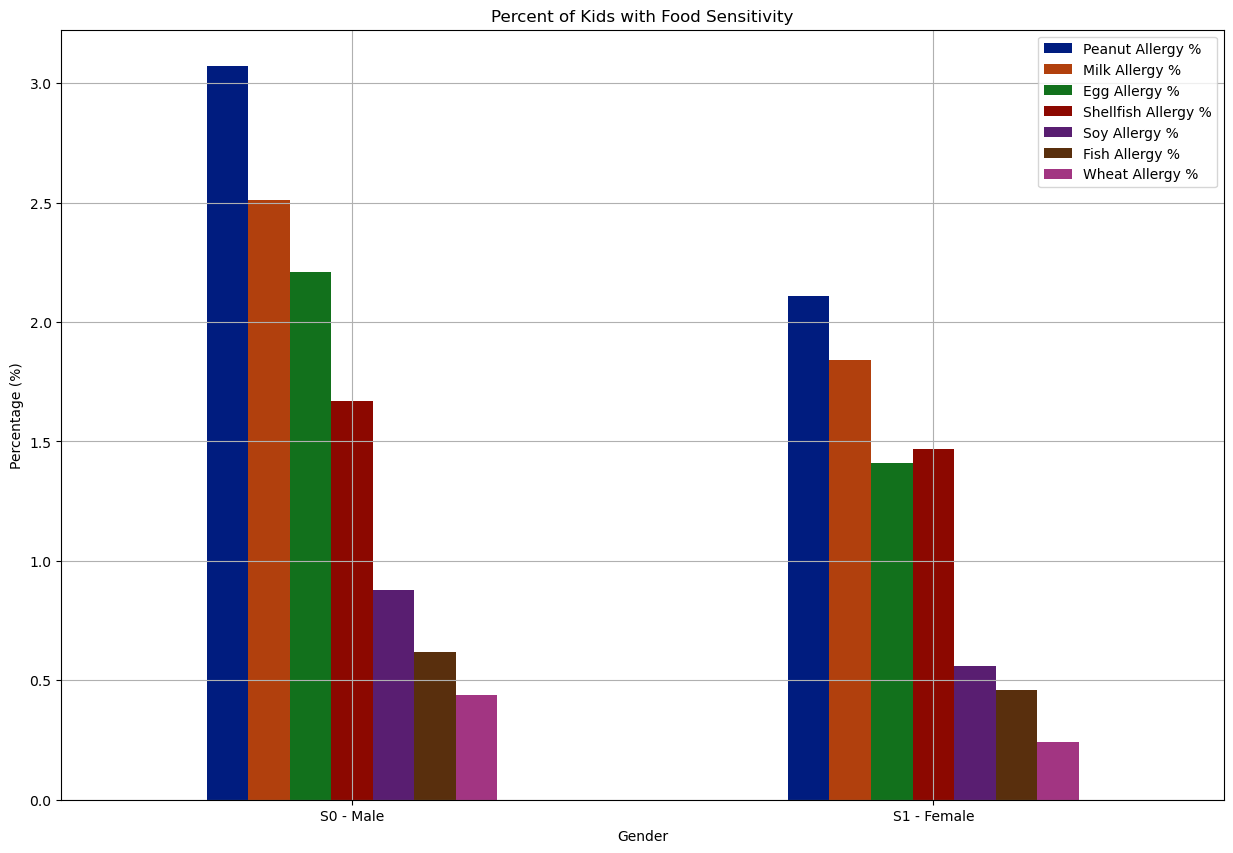

In [197]:
gender_plot = gender_chart_df.plot(kind="bar", align = "center", figsize=(15,10))
xticklabels = gender_chart_df.index
gender_plot.set_xticklabels(xticklabels, rotation=0, rotation_mode="anchor", ha="center", wrap=True)

plt.title("Percent of Kids with Food Sensitivity")
plt.xlabel("Gender")
plt.ylabel("Percentage (%)")
plt.grid(True)
plt.savefig("output/percent_by_gender.png")

plt.show()

<h1> Alex's part </h1>

In [198]:
alg_start = 'ALG_START'
allergy_list = [x for x in allergy_df.columns if 'ALG_START' in x]
alg_name_list = ['SHELLFISH',
 'FISH',
 'MILK',
 'SOY',
 'EGG',
 'WHEAT',
 'PEANUT',
 'SESAME',
 'TREENUT',
 'WALNUT',
 'PECAN',
 'PISTACH',
 'ALMOND',
 'BRAZIL',
 'HAZELNUT',
 'CASHEW']


In [200]:
shellfish_df = get_allergen_df('shellfish')
fish_df = get_allergen_df('fish')
milk_df = get_allergen_df('milk')
soy_df = get_allergen_df('soy')
egg_df = get_allergen_df('egg')
wheat_df = get_allergen_df('wheat')
peanut_df = get_allergen_df('peanut')
sesame_df = get_allergen_df('sesame')
walnut_df = get_allergen_df('walnut')
pecan_df = get_allergen_df('pecan')
pistach_df = get_allergen_df('pistach')
almond_df = get_allergen_df('almond')
brazil_df = get_allergen_df('brazil')
hazelnut_df = get_allergen_df('hazelnut')
cashew_df = get_allergen_df('cashew')


In [201]:
shellfish_count = shellfish_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
fish_count = fish_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
milk_count = milk_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
soy_count = soy_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
egg_count = egg_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
wheat_count = wheat_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
peanut_count = peanut_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
sesame_count = sesame_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
walnut_count = walnut_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
pecan_count = pecan_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
pistach_count = pistach_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
brazil_count = brazil_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
hazelnut_count = hazelnut_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']
cashew_count = cashew_df.groupby('BIRTH_YEAR').count()['SUBJECT_ID']


In [202]:
all_counts = [shellfish_count, fish_count, milk_count, soy_count, egg_count, wheat_count, peanut_count, sesame_count, walnut_count, pecan_count, pistach_count, brazil_count, hazelnut_count, cashew_count]


In [204]:
allergy_count = []
for allergy in allergy_list:
    allergy_count.append(allergy_df.groupby('BIRTH_YEAR').count()[allergy])


In [205]:
allergy_count_df = pd.DataFrame(allergy_count)

In [206]:
allergy_count_df = allergy_count_df.transpose()

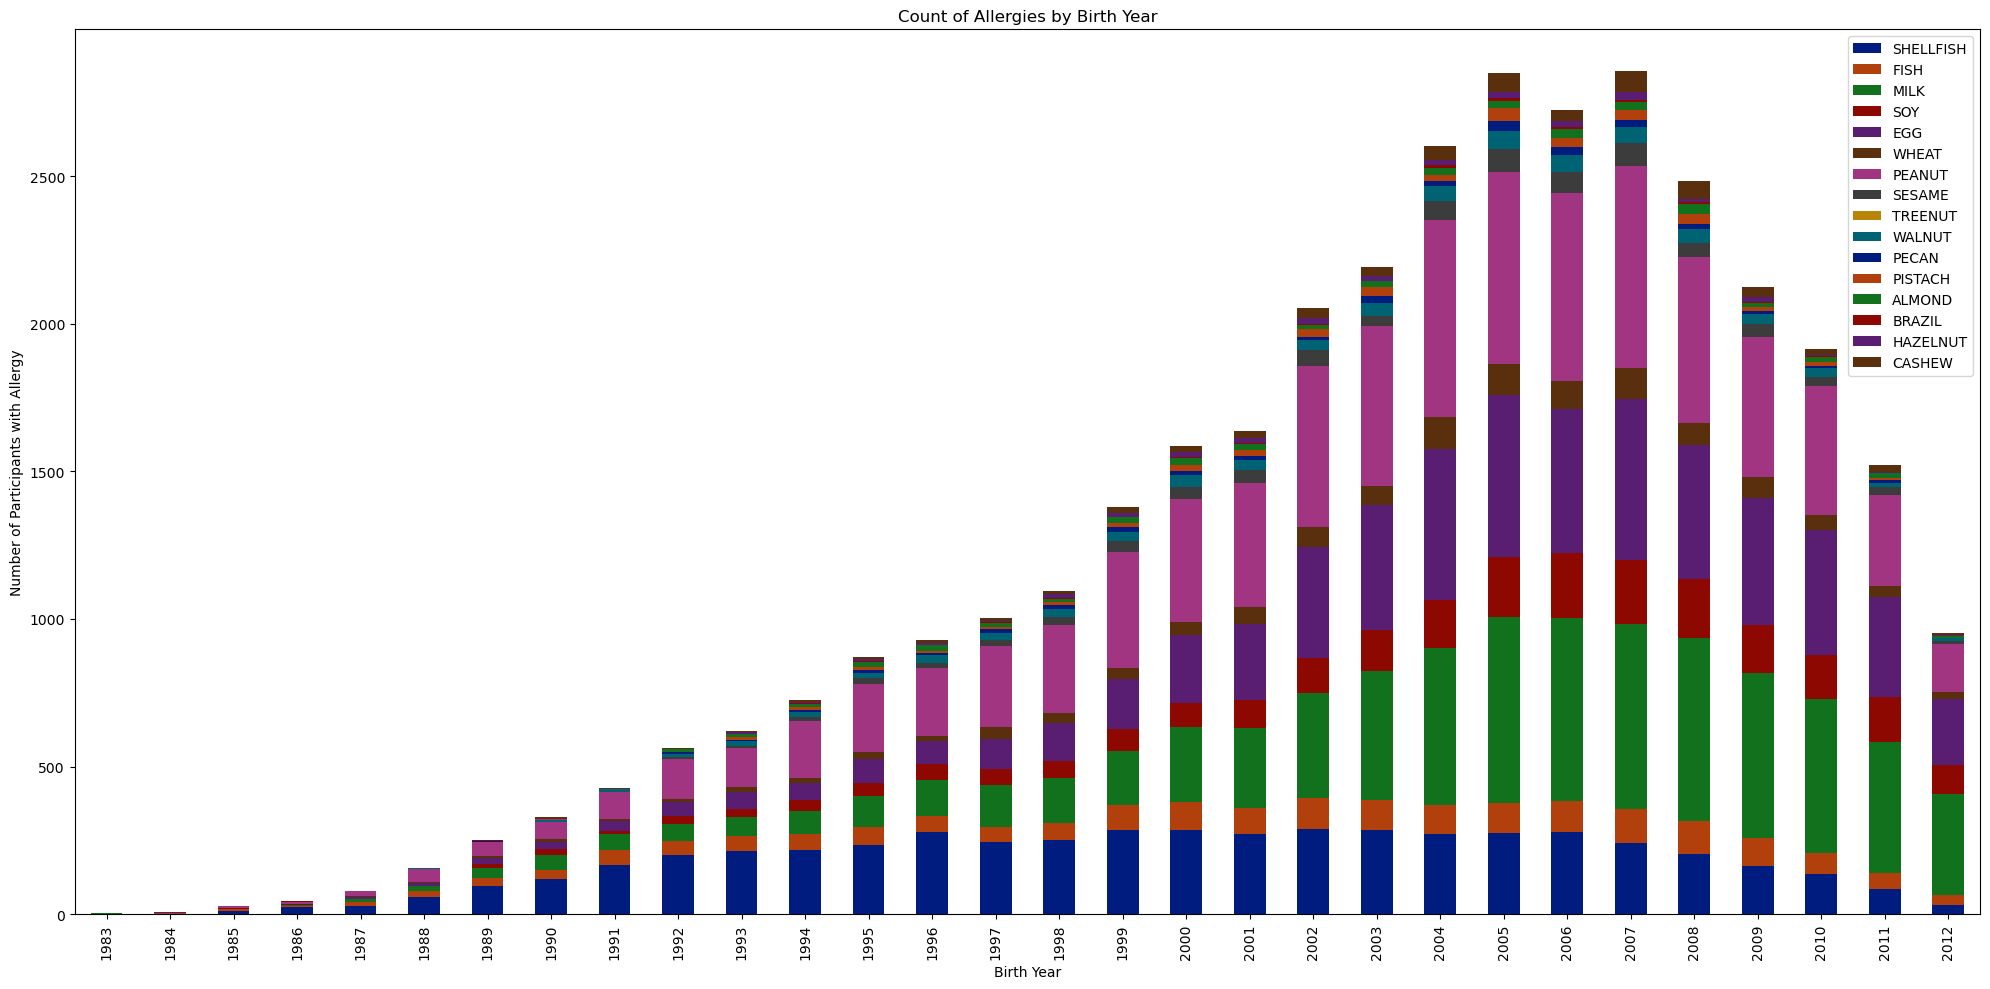

In [207]:
allergy_count_df.plot.bar(stacked=True, figsize = (20, 10))
plt.legend(labels = alg_name_list)
plt.xlabel("Birth Year")
plt.ylabel("Number of Participants with Allergy")
plt.title("Count of Allergies by Birth Year")
plt.tight_layout()
plt.savefig('output/stacked allergy by year.png')


In [208]:
#length of time in study graphed against change in asthma meds
#count of allergen kids sorted by length of time in study

allergy_df['TIME_IN_STUDY_YEARS'] = allergy_df['AGE_END_YEARS'] - allergy_df['AGE_START_YEARS']
allergy_df['CHANGE_IN_ASTHMARX'] = allergy_df['LAST_ASTHMARX'] - allergy_df['FIRST_ASTHMARX']


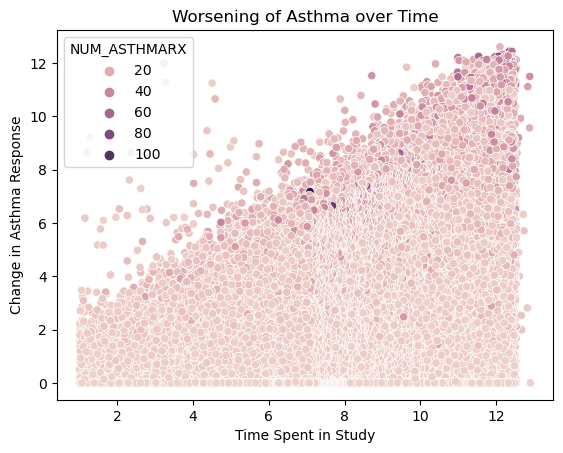

In [209]:
sns.scatterplot(data=allergy_df, x='TIME_IN_STUDY_YEARS', y='CHANGE_IN_ASTHMARX', hue='NUM_ASTHMARX')
plt.xlabel("Time Spent in Study")
plt.ylabel("Change in Asthma Response")
plt.title("Worsening of Asthma over Time")
plt.savefig("output/asthmaovertime.png")
# plt.legend("Number of Asthma Prescriptions")

In [211]:
total_count = allergy_df.count()['SUBJECT_ID']
    


In [212]:
milk_percentage = round(milk_count / total_count * 100, 2)

In [213]:
allergy_percentage = []
for allergy in allergy_list:
    allergy_percentage.append(round(allergy_df.groupby('BIRTH_YEAR').count()[allergy] / total_count * 100, 2))

In [214]:
allergy_percentage_df = pd.DataFrame(allergy_percentage)

In [215]:
allergy_percentage_df.head()

BIRTH_YEAR,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
SHELLFISH_ALG_START,0.0,0.0,0.0,0.01,0.01,0.02,0.03,0.04,0.05,0.06,...,0.09,0.08,0.08,0.08,0.07,0.06,0.05,0.04,0.03,0.01
FISH_ALG_START,0.0,0.0,0.0,0.00,0.00,0.01,0.01,0.01,0.02,0.01,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.01
MILK_ALG_START,0.0,0.0,0.0,0.00,0.00,0.01,0.01,0.02,0.02,0.02,...,0.13,0.16,0.19,0.19,0.19,0.19,0.17,0.16,0.13,0.10
SOY_ALG_START,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.01,0.00,0.01,...,0.04,0.05,0.06,0.07,0.06,0.06,0.05,0.04,0.05,0.03
EGG_ALG_START,0.0,0.0,0.0,0.00,0.00,0.00,0.01,0.01,0.01,0.01,...,0.13,0.15,0.16,0.15,0.16,0.14,0.13,0.13,0.10,0.07


In [216]:
birth_year = allergy_count_df.transpose()